In [2]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns
from google.cloud import bigquery
import os
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="optical-hexagon-308004-a6230a51110a.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [3]:
%%bigquery zip_codes_2015
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`

Downloading: 100%|████████████████████████████████████████████████████████████| 33120/33120 [00:35<00:00, 938.56rows/s]


In [4]:
#Has a very few observations 
zri_mult = pd.read_csv('Zip_Zri_MultiFamilyResidenceRental.csv')
zri_mult.shape

(1861, 120)

In [4]:
#Has a lot more observations 
zri_all = pd.read_csv('Zip_Zri_AllHomesPlusMultifamily.csv')
zri_all.shape

(13181, 120)

In [6]:
zri_all.head()

RegionID  RegionName      City State                             Metro  \
0     61639       10025  New York    NY       New York-Newark-Jersey City   
1     84654       60657   Chicago    IL          Chicago-Naperville-Elgin   
2     61637       10023  New York    NY       New York-Newark-Jersey City   
3     91982       77494      Katy    TX  Houston-The Woodlands-Sugar Land   
4     84616       60614   Chicago    IL          Chicago-Naperville-Elgin   

        CountyName  SizeRank  2010-09  2010-10  2010-11  2010-12  2011-01  \
0  New York County         1   3031.0   3058.0   3031.0   3015.0   2976.0   
1      Cook County         2   1790.0   1787.0   1784.0   1774.0   1755.0   
2  New York County         3   3269.0   3304.0   3320.0   3322.0   3283.0   
3    Harris County         4   1547.0   1549.0   1560.0   1560.0   1542.0   
4      Cook County         5   1922.0   1925.0   1921.0   1908.0   1870.0   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0   2914.0   2860.0   2811.0   2792.0   2799.0   2820.0   2852.0   2885.0   
1   1742.0   1735.0   1741.0   1742.0   1757.0   1790.0   1817.0   1839.0   
2   3225.0   3133.0   3086.0   3017.0   3005.0   3010.0   3016.0   3028.0   
3   1547.0   1559.0   1578.0   1591.0   1597.0   1604.0   1609.0   1607.0   
4   1841.0   1825.0   1823.0   1829.0   1850.0   1894.0   1937.0   1966.0   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0   2905.0   2883.0   2879.0   2905.0   2916.0   2908.0   2915.0   2920.0   
1   1841.0   1844.0   1844.0   1820.0   1818.0   1829.0   1843.0   1860.0   
2   3069.0   3020.0   2999.0   2988.0   3023.0   3037.0   3055.0   3069.0   
3   1598.0   1591.0   1591.0   1606.0   1614.0   1617.0   1612.0   1611.0   
4   1977.0   1982.0   1977.0   1950.0   1945.0   1956.0   1980.0   1989.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   2920.0   2938.0   2999.0   3029.0   3022.0   3049.0   3083.0   3086.0   
1   1878.0   1898.0   1889.0   1890.0   1894.0   1897.0   1886.0   1884.0   
2   3058.0   3065.0   3104.0   3117.0   3118.0   3124.0   3128.0   3098.0   
3   1617.0   1630.0   1640.0   1649.0   1655.0   1658.0   1658.0   1661.0   
4   2012.0   2021.0   2021.0   2035.0   2076.0   2093.0   2098.0   2114.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3072.0   3081.0   3095.0   3147.0   3190.0   3188.0   3149.0   3149.0   
1   1887.0   1907.0   1918.0   1925.0   1948.0   1996.0   2017.0   2011.0   
2   3078.0   3119.0   3150.0   3183.0   3227.0   3233.0   3199.0   3217.0   
3   1675.0   1698.0   1727.0   1753.0   1771.0   1789.0   1808.0   1852.0   
4   2123.0   2119.0   2113.0   2096.0   2108.0   2153.0   2189.0   2192.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3174.0   3175.0   3230.0   3267.0   3285.0   3234.0   3296.0   3357.0   
1   2002.0   1989.0   1984.0   1979.0   1976.0   1969.0   1989.0   1996.0   
2   3255.0   3274.0   3346.0   3357.0   3363.0   3287.0   3312.0   3385.0   
3   1882.0   1906.0   1920.0   1930.0   1936.0   1931.0   1925.0   1929.0   
4   2190.0   2186.0   2193.0   2169.0   2156.0   2145.0   2167.0   2182.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3366.0      NaN   3186.0   3204.0      NaN      NaN      NaN   3682.0   
1   2001.0   2006.0   2009.0   2032.0   2045.0   2038.0   2028.0   2016.0   
2   3385.0      NaN   3231.0   3258.0      NaN      NaN      NaN      NaN   
3   1935.0   1953.0   1967.0   1984.0   1994.0   1999.0   1999.0   1945.0   
4   2191.0   2204.0   2222.0   2247.0   2253.0   2254.0   2241.0   2227.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   3767.0   3767.0   3811.0   3793.0   3894.0   3919.0      NaN      NaN   
1   2028.0   2033.0   2027.0   2041.0   2071.0   2100.0   2136.0   2139.0   
2   4011.0   3985.0   4026.0   4012.0      NaN      NaN      NaN    

# ZRI Phoenix

In [11]:
zri_all_phoenix = zri_all[zri_all['State'] == 'AZ']
zri_phoenix_pre_growthrate = zri_all_phoenix.loc[:,['RegionName','2010-09','2010-10','2010-11','2010-12',
                                                    '2011-01', '2011-02', '2011-03', '2011-04', '2011-05','2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11','2011-12',
                                                    '2012-01','2012-02','2012-03','2012-04','2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
                                                    '2013-01','2013-02','2013-03','2013-04','2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
                                                    '2014-01','2014-02','2014-03','2014-04','2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
                                                    '2015-01','2015-02','2015-03','2015-04','2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
                                                   '2016-01','2016-02','2016-03','2016-04','2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
                                                   '2017-01','2017-02','2017-03','2017-04','2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                                                   '2018-01','2018-02','2018-03','2018-04','2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                                                   '2019-01','2019-02','2019-03','2019-04','2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12','2020-01']]
zri_phoenix_pre_growthrate = zri_phoenix_pre_growthrate.sort_values("RegionName")
zri_phoenix_pre_growthrate.head()

RegionName  2010-09  2010-10  2010-11  2010-12  2011-01  2011-02  \
8222       85003   1197.0   1178.0   1147.0   1149.0   1132.0   1146.0   
8188       85004   1055.0   1057.0   1052.0   1048.0   1051.0   1052.0   
4964       85006    913.0    919.0    916.0    914.0    911.0    909.0   
7689       85007    874.0    864.0    871.0    874.0    869.0    869.0   
527        85008    880.0    891.0    894.0    892.0    888.0    885.0   

      2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  2011-10  \
8222   1178.0   1187.0   1190.0   1207.0      NaN   1185.0   1169.0   1153.0   
8188   1059.0   1063.0   1072.0   1079.0   1085.0   1081.0   1075.0   1063.0   
4964    912.0    914.0    919.0    923.0    921.0    919.0    915.0    908.0   
7689    872.0    870.0    875.0    879.0    877.0    876.0    871.0    866.0   
527     889.0    891.0    897.0    897.0    898.0    898.0    894.0    888.0   

      2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  2012-06  \
8222   1147.0   1146.0   1133.0   1135.0   1153.0   1155.0   1130.0   1114.0   
8188   1048.0   1040.0   1037.0   1034.0   1034.0   1038.0   1037.0   1040.0   
4964    899.0    893.0    893.0    890.0    891.0    892.0    895.0    900.0   
7689    860.0    855.0    850.0    846.0    846.0    845.0    848.0    851.0   
527     885.0    883.0    884.0    886.0    885.0    885.0    884.0    884.0   

      2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  2013-02  \
8222   1082.0   1087.0   1090.0   1092.0   1093.0   1077.0   1055.0   1054.0   
8188   1039.0   1034.0   1031.0   1032.0   1032.0   1039.0   1039.0   1035.0   
4964    900.0    901.0    899.0    899.0    899.0    898.0    892.0    885.0   
7689    851.0    850.0    849.0    850.0    851.0    850.0    851.0    850.0   
527     885.0    886.0    886.0    887.0    886.0    886.0    885.0    882.0   

      2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  2013-10  \
8222   1059.0   1076.0   1074.0   1082.0   1075.0      NaN      NaN   1174.0   
8188   1040.0   1046.0   1050.0   1061.0   1076.0   1088.0   1086.0   1079.0   
4964    885.0    892.0    891.0    908.0    919.0    928.0    938.0    944.0   
7689    848.0    852.0    855.0    859.0    863.0    871.0    878.0    877.0   
527     882.0    885.0    895.0    907.0    914.0    917.0    920.0    926.0   

      2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  2014-06  \
8222   1171.0   1164.0      NaN   1096.0   1093.0   1102.0   1110.0   1106.0   
8188   1083.0   1087.0   1091.0   1092.0   1102.0   1111.0   1120.0   1120.0   
4964    951.0    955.0    951.0    949.0    958.0    969.0    984.0    985.0   
7689    875.0    876.0    874.0    873.0    881.0    888.0    896.0    899.0   
527     934.0    937.0    936.0    936.0    943.0    950.0    956.0    960.0   

      2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  2015-02  \
8222   1131.0   1138.0   1147.0   1159.0   1167.0   1166.0   1160.0   1169.0   
8188   1132.0   1146.0   1155.0   1165.0   1163.0   1160.0   1154.0   1154.0   
4964    993.0   1011.0   1035.0   1045.0   1046.0   1046.0   1046.0   1051.0   
7689    910.0    918.0    933.0    947.0    942.0    944.0    947.0    951.0   
527     975.0    987.0   1002.0   1011.0   1014.0   1018.0   1019.0   1023.0   

      2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  2015-10  \
8222   1190.0   1206.0   1216.0   1227.0   1234.0   1234.0   1244.0   1245.0   
8188   1167.0   1175.0   1181.0   1191.0   1196.0   1204.0   1209.0   1213.0   
4964   1063.0   1081.0   1092.0   1111.0   1115.0   1119.0   1120.0   1115.0   
7689    961.0    972.0    984.0    995.0    990.0    996.0    995.0    994.0   
527    1033.0   1050.0   1058.0   1077.0   1084.0   1078.0   1079.0   1078.0   

      2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  2016-05  2016-06  \
8222   1239.0   1237.0   1217.0   1203.0   1206.0   1227.0   1256.0   1267.0   
8188   1208.0   1211.0   1209.0   

In [185]:
zri_phoenix_copy = zri_phoenix_pre_growthrate.copy()
zri_phoenix_copy.head()

RegionName  2010-09  2010-10  2010-11  2010-12  2011-01  2011-02  \
8222       85003   1197.0   1178.0   1147.0   1149.0   1132.0   1146.0   
8188       85004   1055.0   1057.0   1052.0   1048.0   1051.0   1052.0   
4964       85006    913.0    919.0    916.0    914.0    911.0    909.0   
7689       85007    874.0    864.0    871.0    874.0    869.0    869.0   
527        85008    880.0    891.0    894.0    892.0    888.0    885.0   

      2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  2011-10  \
8222   1178.0   1187.0   1190.0   1207.0      NaN   1185.0   1169.0   1153.0   
8188   1059.0   1063.0   1072.0   1079.0   1085.0   1081.0   1075.0   1063.0   
4964    912.0    914.0    919.0    923.0    921.0    919.0    915.0    908.0   
7689    872.0    870.0    875.0    879.0    877.0    876.0    871.0    866.0   
527     889.0    891.0    897.0    897.0    898.0    898.0    894.0    888.0   

      2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  2012-06  \
8222   1147.0   1146.0   1133.0   1135.0   1153.0   1155.0   1130.0   1114.0   
8188   1048.0   1040.0   1037.0   1034.0   1034.0   1038.0   1037.0   1040.0   
4964    899.0    893.0    893.0    890.0    891.0    892.0    895.0    900.0   
7689    860.0    855.0    850.0    846.0    846.0    845.0    848.0    851.0   
527     885.0    883.0    884.0    886.0    885.0    885.0    884.0    884.0   

      2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  2013-02  \
8222   1082.0   1087.0   1090.0   1092.0   1093.0   1077.0   1055.0   1054.0   
8188   1039.0   1034.0   1031.0   1032.0   1032.0   1039.0   1039.0   1035.0   
4964    900.0    901.0    899.0    899.0    899.0    898.0    892.0    885.0   
7689    851.0    850.0    849.0    850.0    851.0    850.0    851.0    850.0   
527     885.0    886.0    886.0    887.0    886.0    886.0    885.0    882.0   

      2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  2013-10  \
8222   1059.0   1076.0   1074.0   1082.0   1075.0      NaN      NaN   1174.0   
8188   1040.0   1046.0   1050.0   1061.0   1076.0   1088.0   1086.0   1079.0   
4964    885.0    892.0    891.0    908.0    919.0    928.0    938.0    944.0   
7689    848.0    852.0    855.0    859.0    863.0    871.0    878.0    877.0   
527     882.0    885.0    895.0    907.0    914.0    917.0    920.0    926.0   

      2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  2014-06  \
8222   1171.0   1164.0      NaN   1096.0   1093.0   1102.0   1110.0   1106.0   
8188   1083.0   1087.0   1091.0   1092.0   1102.0   1111.0   1120.0   1120.0   
4964    951.0    955.0    951.0    949.0    958.0    969.0    984.0    985.0   
7689    875.0    876.0    874.0    873.0    881.0    888.0    896.0    899.0   
527     934.0    937.0    936.0    936.0    943.0    950.0    956.0    960.0   

      2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  2015-02  \
8222   1131.0   1138.0   1147.0   1159.0   1167.0   1166.0   1160.0   1169.0   
8188   1132.0   1146.0   1155.0   1165.0   1163.0   1160.0   1154.0   1154.0   
4964    993.0   1011.0   1035.0   1045.0   1046.0   1046.0   1046.0   1051.0   
7689    910.0    918.0    933.0    947.0    942.0    944.0    947.0    951.0   
527     975.0    987.0   1002.0   1011.0   1014.0   1018.0   1019.0   1023.0   

      2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  2015-10  \
8222   1190.0   1206.0   1216.0   1227.0   1234.0   1234.0   1244.0   1245.0   
8188   1167.0   1175.0   1181.0   1191.0   1196.0   1204.0   1209.0   1213.0   
4964   1063.0   1081.0   1092.0   1111.0   1115.0   1119.0   1120.0   1115.0   
7689    961.0    972.0    984.0    995.0    990.0    996.0    995.0    994.0   
527    1033.0   1050.0   1058.0   1077.0   1084.0   1078.0   1079.0   1078.0   

      2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  2016-05  2016-06  \
8222   1239.0   1237.0   1217.0   1203.0   1206.0   1227.0   1256.0   1267.0   
8188   1208.0   1211.0   1209.0   

Plot - Tampa: Average Zri Index by Date (2015 - 2017)

Text(0.5, 1.0, 'Phoenix: Average Zri Index by Date (2015 - 2017)')

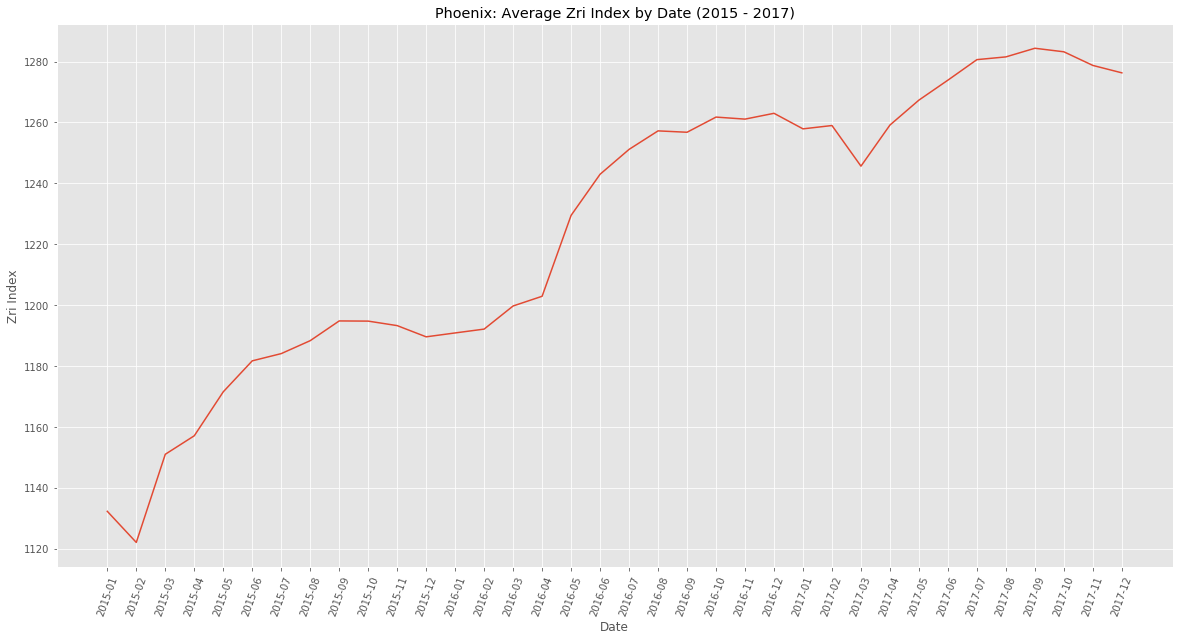

In [188]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_copy.loc[:,"2015-01":'2017-12'].mean())
plt.ylabel("Zri Index")
plt.xlabel("Date")
plt.title("Phoenix: Average Zri Index by Date (2015 - 2017)")

# Zri Pheonix Growthrate

In [79]:
#Growthrate 2015 -2017
zri_phoenix_growthrate = zri_phoenix_pre_growthrate.loc[:, "2014-12":'2017-12']
zri_phoenix_growthrate = zri_phoenix_growthrate.T.pct_change()
zri_phoenix_growthrate.columns = zri_phoenix_pre_growthrate['RegionName']
zri_phoenix_growthrate.index.names = ["Date"]
zri_phoenix_growthrate = zri_phoenix_growthrate.reset_index()
zri_phoenix_growthrate = zri_phoenix_growthrate.iloc[1:,:]
zri_phoenix_growthrate.head()

RegionName     Date     85003     85004     85006     85007     85008  \
1           2015-01 -0.005146 -0.005172  0.000000  0.003178  0.000982   
2           2015-02  0.007759  0.000000  0.004780  0.004224  0.003925   
3           2015-03  0.017964  0.011265  0.011418  0.010515  0.009775   
4           2015-04  0.013445  0.006855  0.016933  0.011446  0.016457   
5           2015-05  0.008292  0.005106  0.010176  0.012346  0.007619   

RegionName     85009     85012     85013     85014     85015     85016  \
1           0.004420  0.004019  0.004284  0.000886  0.005208  0.002318   
2           0.001100  0.001601  0.005119  0.007080  0.008290  0.007710   
3           0.012088  0.001599  0.008489  0.012302  0.012333  0.006121   
4           0.009772  0.007981  0.009259  0.008681  0.005076  0.009886   
5           0.012903  0.013460  0.007506  0.002582  0.009091  0.009036   

RegionName     85017     85018     85019     85020     85021     85022  \
1           0.004505  0.004332 -0.005000  0.000000  0.000883 -0.000873   
2           0.008969  0.012221  0.005025  0.002593  0.002646  0.001747   
3           0.012222  0.010653  0.009000  0.009483  0.012313  0.010462   
4           0.007684  0.014055  0.008920  0.005124  0.005213  0.003451   
5           0.005447  0.012474  0.011788  0.006797  0.006050  0.002580   

RegionName     85023     85024     85027     85028     85029     85031  \
1           0.002686  0.005314  0.004762 -0.001840  0.006036  0.012486   
2           0.003571  0.002643  0.003791  0.009834  0.008000  0.008969   
3           0.009786  0.012302  0.016997  0.002435  0.014881  0.013333   
4           0.004405  0.004340  0.012999  0.006072  0.011730 -0.002193   
5           0.005263  0.001729  0.007333 -0.007242  0.003865  0.009890   

RegionName     85032     85033     85034     85035     85037     85040  \
1          -0.000853  0.005112  0.000000  0.005382  0.001976  0.001043   
2           0.004270  0.006104 -0.048250  0.006424  0.006903  0.005208   
3           0.007653  0.018200  0.002982  0.011702  0.012733  0.007254   
4           0.005063  0.012910  0.010902  0.012618  0.012573  0.016461   
5           0.007557  0.004902  0.000980  0.008307  0.007641  0.009109   

RegionName     85041     85042     85043     85044     85045     85048  \
1           0.001892  0.001885  0.001066  0.002425 -0.002075  0.009053   
2           0.008499  0.004704  0.001065  0.004839  0.000000  0.009788   
3           0.016854  0.015918  0.009574  0.003210  0.037422  0.000000   
4           0.012891  0.014747  0.009484  0.004800 -0.018704  0.003231   
5           0.007273  0.000908  0.011482  0.008758 -0.007488  0.000000   

RegionName     85050     85051     85053     85083     85085     85086  \
1          -0.003873  0.003148 -0.003663  0.002463       NaN -0.006677   
2           0.000778  0.008368  0.007353  0.009828  0.007048  0.010456   
3           0.009324  0.012448  0.010036  0.008921  0.011664  0.025129   
4           0.006159  0.009221  0.000000  0.003215  0.010761  0.007931   
5           0.009946  0.011168  0.005420  0.003205  0.011407  0.005007   

RegionName     85087     85118     85119     85120     85122     85123  \
1          -0.010497  0.010999 -0.005455 -0.012464 -0.005274 -0.008159   
2           0.007072  0.010879 -0.002742 -0.006796  0.005302 -0.004700   
3           0.026685  0.006278 -0.002750 -0.004888  0.007384 -0.004723   
4           0.022572  0.003565 -0.000919 -0.001965  0.007330  0.005931   
5           0.018729 -0.002664 -0.000920  0.003937  0.007277  0.010613   

RegionName     85128     85131     85132     85138     85139     85140  \
1           0.000000  0.003440  0.005495 -0.004090 -0.002215 -0.013310   
2           0.001149  0.004571  0.006557  0.000000 -0.002220 -0.003597   
3           0.003444  0.005688  0.004343  0.002053  0.002225 -0.001805   
4           0.005721  0.002262  0.008649  0.005123 -0.001110  0.003617   
5           0.009101  0.007901  0.010718  0.006116  0.003333  0.001802   

R

In [172]:
#Growthrate 2010- 2020 (10 years)
zri_phoenix_growthrate_ten = zri_phoenix_pre_growthrate.loc[:, "2010-10":'2020-01']
zri_phoenix_growthrate_ten = zri_phoenix_growthrate_ten.T.pct_change()
zri_phoenix_growthrate_ten.columns = zri_phoenix_pre_growthrate['RegionName']
zri_phoenix_growthrate_ten.index.names = ["Date"]
zri_phoenix_growthrate_ten = zri_phoenix_growthrate_ten.reset_index()
zri_phoenix_growthrate_ten = zri_phoenix_growthrate_ten.iloc[1:,:]
zri_phoenix_growthrate_ten.head()

RegionName     Date     85003     85004     85006     85007     85008  \
1           2010-11 -0.026316 -0.004730 -0.003264  0.008102  0.003367   
2           2010-12  0.001744 -0.003802 -0.002183  0.003444 -0.002237   
3           2011-01 -0.014795  0.002863 -0.003282 -0.005721 -0.004484   
4           2011-02  0.012367  0.000951 -0.002195  0.000000 -0.003378   
5           2011-03  0.027923  0.006654  0.003300  0.003452  0.004520   

RegionName     85009     85012     85013     85014     85015     85016  \
1           0.001185       NaN -0.001864 -0.018850  0.002240  0.002313   
2          -0.001183 -0.012549 -0.001867 -0.010567 -0.003352  0.000769   
3          -0.002370 -0.023828 -0.000935 -0.004854  0.004484 -0.011530   
4          -0.001188 -0.015460 -0.000936 -0.004878  0.002232 -0.010886   
5           0.011891 -0.008264  0.002812 -0.000980  0.003341 -0.011006   

RegionName     85017     85018     85019     85020     85021     85022  \
1                NaN -0.004418  0.007376 -0.010999 -0.008411 -0.003643   
2          -0.009547  0.000000 -0.002092 -0.004634 -0.005655 -0.010055   
3          -0.003614 -0.016272 -0.003145 -0.000931  0.003791 -0.007387   
4          -0.002418 -0.014286  0.001052 -0.002796 -0.004721 -0.005581   
5           0.001212 -0.014493  0.002101  0.000000 -0.004744 -0.005613   

RegionName     85023     85024     85027     85028     85029     85031  \
1          -0.007512  0.004840       NaN  0.004268 -0.008520       NaN   
2          -0.011353 -0.004817  0.005230  0.009107 -0.007519 -0.004684   
3          -0.003828 -0.008712  0.003122  0.001805 -0.001082 -0.002353   
4          -0.002882 -0.006836  0.004149 -0.006006 -0.001083  0.001179   
5          -0.001927 -0.010816  0.001033 -0.011480 -0.002169  0.001178   

RegionName     85032     85033     85034     85035     85037     85040  \
1           0.010372       NaN  0.015756 -0.022272 -0.002107  0.000000   
2          -0.004277  0.003375 -0.011375 -0.028474 -0.005280 -0.002331   
3          -0.012887  0.000000 -0.007322 -0.008206  0.000000  0.004673   
4          -0.016536 -0.001121 -0.007376  0.015366 -0.003185  0.002326   
5          -0.018584  0.001122  0.004246  0.017462  0.000000  0.002320   

RegionName     85041     85042     85043     85044     85045     85048  \
1          -0.005010 -0.001040 -0.010477 -0.007779  0.002730 -0.025108   
2          -0.008056 -0.001041 -0.001176 -0.001742  0.000000 -0.013321   
3           0.006091  0.004167 -0.001178 -0.006108  0.000000 -0.009001   
4           0.006054 -0.001037 -0.001179 -0.013169  0.000000 -0.008174   
5           0.003009  0.005192  0.001181 -0.003559 -0.025868 -0.010073   

RegionName     85050     85051     85053     85083  85085     85086     85087  \
1           0.006752 -0.009783 -0.007678       NaN    NaN -0.014824  0.008318   
2          -0.003726 -0.009879 -0.010638       NaN    NaN -0.015047  0.019446   
3          -0.020942 -0.003326 -0.003910       NaN    NaN -0.028008 -0.008092   
4          -0.023682 -0.003337 -0.003925  0.003915    NaN  0.000000 -0.015152   
5          -0.028169  0.001116 -0.000985 -0.001560    NaN  0.000000 -0.026627   

RegionName     85118     85119     85120     85122     85123     85128  \
1                NaN  0.000000  0.000000  0.004454  0.010766 -0.003452   
2           0.000722  0.003742  0.003165  0.006652  0.001183 -0.011547   
3          -0.016583  0.007456  0.007361  0.008811  0.002364 -0.009346   
4          -0.013196  0.001850  0.006263  0.005459  0.002358 -0.003538   
5          -0.013373 -0.001847  0.005187  0.004343  0.003529 -0.001183   

RegionName     85131     85132     85138     85139     85140     85142  \
1           0.005754  0.002294  0.005447  0.004630  0.001916       NaN   
2          -0.001144 -0.008009  0.008667 -0.001152  0.002868 -0.002262   
3          -0.002291  0.000000  0.004296 -0.003460  0.004766 -0.018896   
4          -0.004592  0.002307  0.000000 -0.008102  0.002846 -0.014638   
5          -0.001153  0.004603 -0.

Plot: Zipcode: 85225 - Growth Rate by Date (2015 - 2017)

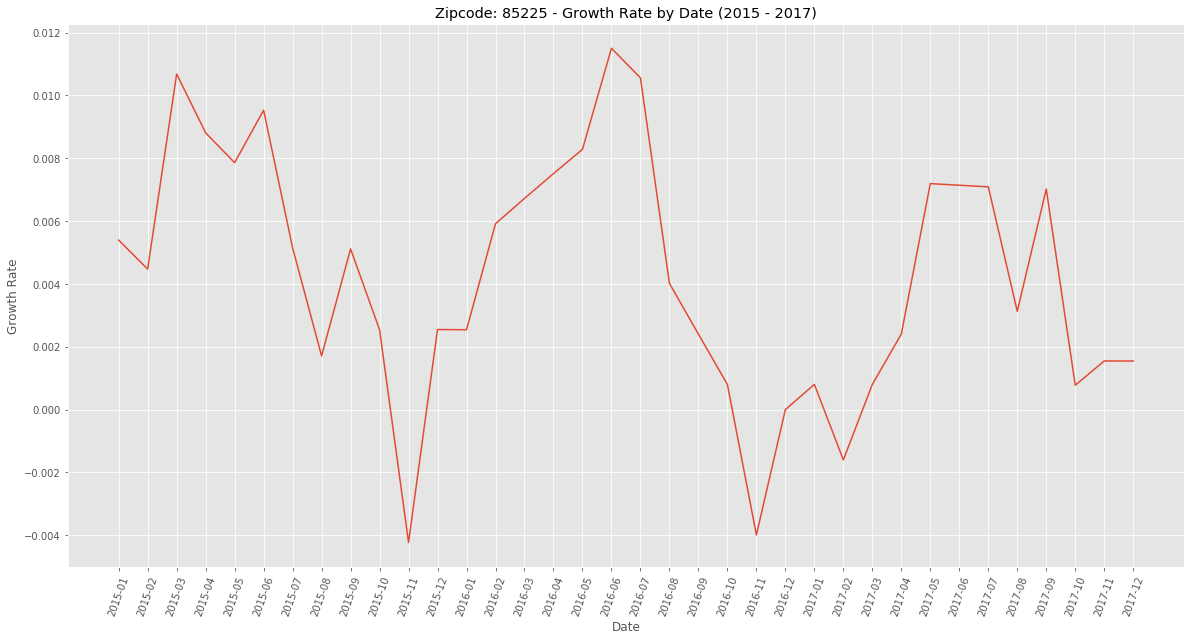

In [32]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_growthrate['Date'], zri_phoenix_growthrate[85225])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 85225 - Growth Rate by Date (2015 - 2017)")

Plot: Zipcode: 85031 - Growth Rate by Date (2015 - 2017)

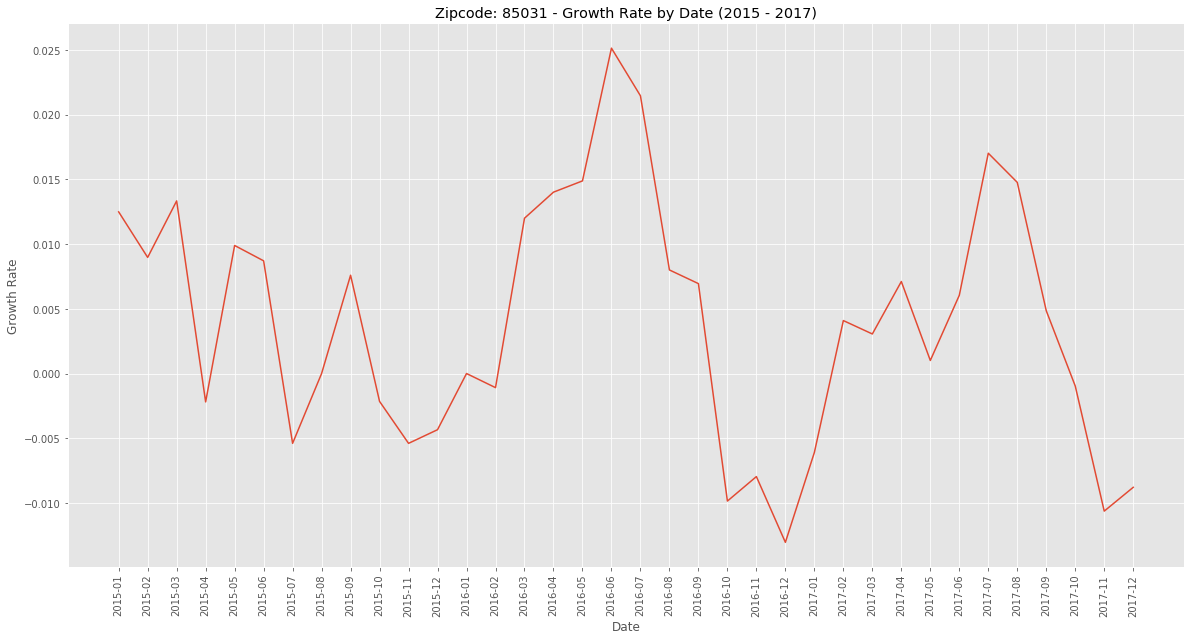

In [38]:
plt.figure(figsize=(20,10))
degrees = 90
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_growthrate['Date'], zri_phoenix_growthrate[85031])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 85031 - Growth Rate by Date (2015 - 2017)")
plt.savefig("Zipcode85031.jpeg")

Plot: Zipcode: 85032 - Growth Rate by Date (2015 - 2017)

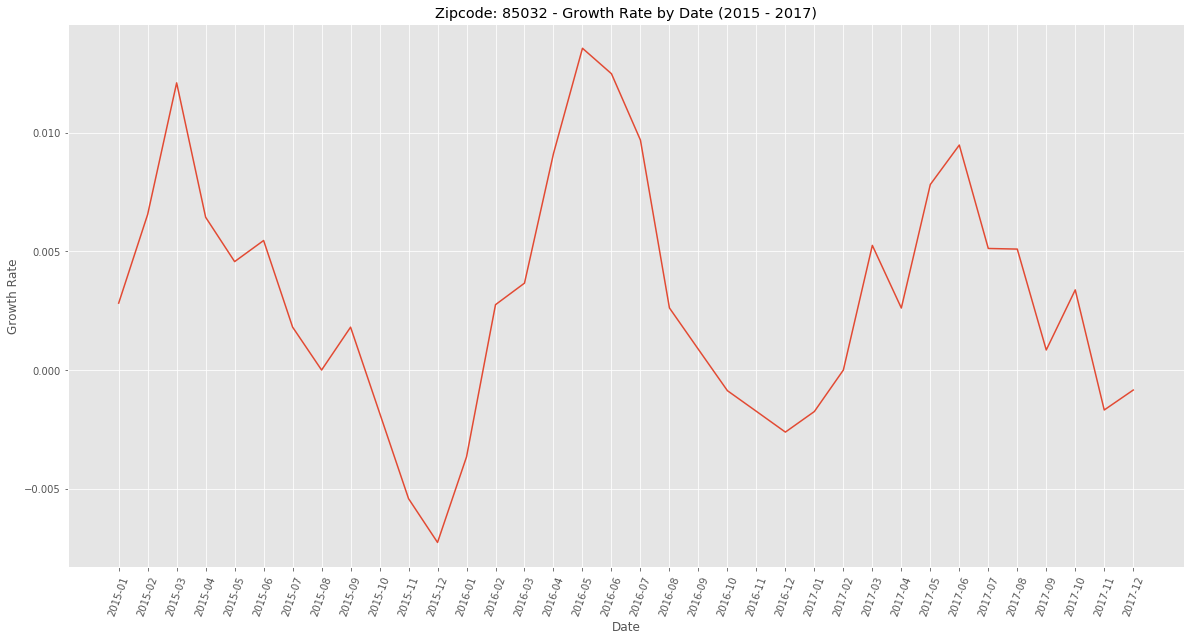

In [37]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_growthrate['Date'], zri_phoenix_growthrate[85302])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 85032 - Growth Rate by Date (2015 - 2017)")


Plot- Average Across Zipcodes : Growth Rate by Date (2015 - 2017)

In [83]:
#Average Across Zipcodes (2015-2017)
gr_copy = zri_phoenix_growthrate.copy()
gr_copy = gr_copy.T
gr_copy.columns = gr_copy.iloc[0]
gr_copy = gr_copy[1:]
gr_copy

Date         2015-01   2015-02   2015-03   2015-04   2015-05   2015-06  \
RegionName                                                               
85003      -0.005146  0.007759  0.017964  0.013445  0.008292  0.009046   
85004      -0.005172       0.0  0.011265  0.006855  0.005106  0.008467   
85006            0.0   0.00478  0.011418  0.016933  0.010176  0.017399   
85007       0.003178  0.004224  0.010515  0.011446  0.012346  0.011179   
85008       0.000982  0.003925  0.009775  0.016457  0.007619  0.017958   
85009        0.00442    0.0011  0.012088  0.009772  0.012903  0.008493   
85012       0.004019  0.001601  0.001599  0.007981   0.01346  0.004687   
85013       0.004284  0.005119  0.008489  0.009259  0.007506  0.006623   
85014       0.000886   0.00708  0.012302  0.008681  0.002582  0.009442   
85015       0.005208   0.00829  0.012333  0.005076  0.009091  0.011011   
85016       0.002318   0.00771  0.006121  0.009886  0.009036   0.00597   
85017       0.004505  0.008969  0.012222  0.007684  0.005447  0.010834   
85018       0.004332  0.012221  0.010653  0.014055  0.012474  0.004791   
85019         -0.005  0.005025     0.009   0.00892  0.011788       0.0   
85020            0.0  0.002593  0.009483  0.005124  0.006797  0.008439   
85021       0.000883  0.002646  0.012313  0.005213   0.00605  0.007732   
85022      -0.000873  0.001747  0.010462  0.003451   0.00258  0.008576   
85023       0.002686  0.003571  0.009786  0.004405  0.005263  0.007853   
85024       0.005314  0.002643  0.012302   0.00434  0.001729  0.006903   
85027       0.004762  0.003791  0.016997  0.012999  0.007333  0.010919   
85028       -0.00184  0.009834  0.002435  0.006072 -0.007242 -0.009119   
85029       0.006036     0.008  0.014881   0.01173  0.003865  0.009625   
85031       0.012486  0.008969  0.013333 -0.002193   0.00989  0.008705   
85032      -0.000853   0.00427  0.007653  0.005063  0.007557  0.005833   
85033       0.005112  0.006104    0.0182   0.01291  0.004902  0.007805   
85034            0.0  -0.04825  0.002982  0.010902   0.00098  0.015671   
85035       0.005382  0.006424  0.011702  0.012618  0.008307  0.006179   
85037       0.001976  0.006903  0.012733  0.012573  0.007641  0.003791   
85040       0.001043  0.005208  0.007254  0.016461  0.009109   0.01003   
85041       0.001892  0.008499  0.016854  0.012891  0.007273  0.011733   
85042       0.001885  0.004704  0.015918  0.014747  0.000908  0.011797   
85043       0.001066  0.001065  0.009574  0.009484  0.011482   0.01032   
85044       0.002425  0.004839   0.00321    0.0048  0.008758  0.007103   
85045      -0.002075       0.0  0.037422 -0.018704 -0.007488  0.020576   
85048       0.009053  0.009788       0.0  0.003231       0.0  0.008052   
85050      -0.003873  0.000778  0.009324  0.006159  0.009946  0.006061   
85051       0.003148  0.008368  0.012448  0.009221  0.011168  0.011044   
85053      -0.003663  0.007353  0.010036       0.0   0.00542  0.010782   
85083       0.002463  0.009828  0.008921  0.003215  0.003205   0.01278   
85085            NaN  0.007048  0.011664  0.010761  0.011407  0.005263   
85086      -0.006677  0.010456  0.025129  0.007931  0.005007    0.0121   
85087      -0.010497  0.007072  0.026685  0.022572  0.018729  0.012475   
85118       0.010999  0.010879  0.006278  0.003565 -0.002664  0.001781   
85119      -0.005455 -0.002742  -0.00275 -0.000919  -0.00092  0.001842   
85120      -0.012464 -0.006796 -0.004888 -0.001965  0.003937  0.007843   
85122      -0.005274  0.005302  0.007384   0.00733  0.007277   0.01032   
85123      -0.008159   -0.0047 -0.004723  0.005931  0.010613  0.005834   
85128            0.0  0.001149  0.003444  0.005721  0.009101  0.011274   
85131        0.00344  0.004571  0.005688  0.002262  0.007901  0.005599   
85132       0.005495  0.006557  0.004343  0.008649  0.010718  0.010604   
85138       -0.00409       0.0  0.002053  0.005123  0.006116  0.006079   
85139      -0.002215  -0.00222  0.002225  -0.00111  0.003333  0.009967   
8514

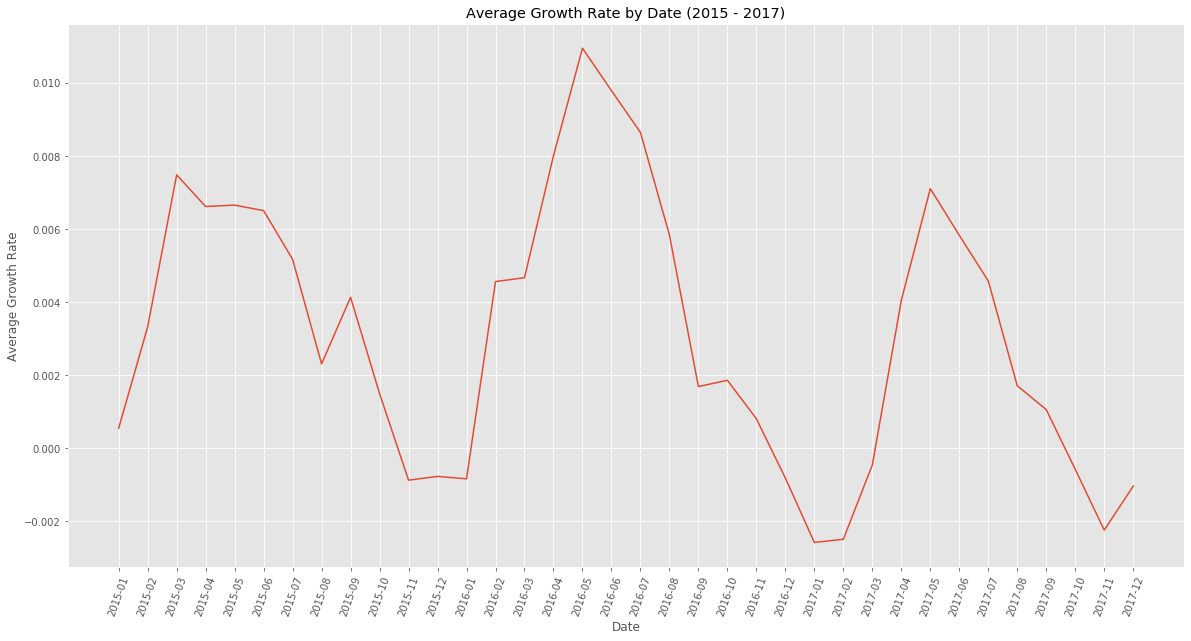

In [93]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(gr_copy.loc[:,"2015-01":'2017-12'].mean())
plt.ylabel("Average Growth Rate")
plt.xlabel("Date")
plt.title("Average Growth Rate by Date (2015 - 2017)")

Plot- Average Across Zipcodes : Growth Rate by Date (2010 - 2020)

In [64]:
zri_phoenix_growthrate_ten.head()

Date      8222      8188      4964      7689       527      3043  \
1  2010-11 -0.026316 -0.004730 -0.003264  0.008102  0.003367  0.001185   
2  2010-12  0.001744 -0.003802 -0.002183  0.003444 -0.002237 -0.001183   
3  2011-01 -0.014795  0.002863 -0.003282 -0.005721 -0.004484 -0.002370   
4  2011-02  0.012367  0.000951 -0.002195  0.000000 -0.003378 -0.001188   
5  2011-03  0.027923  0.006654  0.003300  0.003452  0.004520  0.011891   

       8530      4170      2710      1707       896      3637      1122  \
1       NaN -0.001864 -0.018850  0.002240  0.002313       NaN -0.004418   
2 -0.012549 -0.001867 -0.010567 -0.003352  0.000769 -0.009547  0.000000   
3 -0.023828 -0.000935 -0.004854  0.004484 -0.011530 -0.003614 -0.016272   
4 -0.015460 -0.000936 -0.004878  0.002232 -0.010886 -0.002418 -0.014286   
5 -0.008264  0.002812 -0.000980  0.003341 -0.011006  0.001212 -0.014493   

       5806      1384      1492       483      2386      4030      1655  \
1  0.007376 -0.010999 -0.008411 -0.003643 -0.007512  0.004840       NaN   
2 -0.002092 -0.004634 -0.005655 -0.010055 -0.011353 -0.004817  0.005230   
3 -0.003145 -0.000931  0.003791 -0.007387 -0.003828 -0.008712  0.003122   
4  0.001052 -0.002796 -0.004721 -0.005581 -0.002882 -0.006836  0.004149   
5  0.002101  0.000000 -0.004744 -0.005613 -0.001927 -0.010816  0.001033   

       5401      1189      5646        69      1863     10690      2053  \
1  0.004268 -0.008520       NaN  0.010372       NaN  0.015756 -0.022272   
2  0.009107 -0.007519 -0.004684 -0.004277  0.003375 -0.011375 -0.028474   
3  0.001805 -0.001082 -0.002353 -0.012887  0.000000 -0.007322 -0.008206   
4 -0.006006 -0.001083  0.001179 -0.016536 -0.001121 -0.007376  0.015366   
5 -0.011480 -0.002169  0.001178 -0.018584  0.001122  0.004246  0.017462   

       2278      4413      1226      2167      5206      1172     10104  \
1 -0.002107  0.000000 -0.005010 -0.001040 -0.010477 -0.007779  0.002730   
2 -0.005280 -0.002331 -0.008056 -0.001041 -0.001176 -0.001742  0.000000   
3  0.000000  0.004673  0.006091  0.004167 -0.001178 -0.006108  0.000000   
4 -0.003185  0.002326  0.006054 -0.001037 -0.001179 -0.013169  0.000000   
5  0.000000  0.002320  0.003009  0.005192  0.001181 -0.003559 -0.025868   

       2672      2983      1767      3682      6630  4235      1858      9105  \
1 -0.025108  0.006752 -0.009783 -0.007678       NaN   NaN -0.014824  0.008318   
2 -0.013321 -0.003726 -0.009879 -0.010638       NaN   NaN -0.015047  0.019446   
3 -0.009001 -0.020942 -0.003326 -0.003910       NaN   NaN -0.028008 -0.008092   
4 -0.008174 -0.023682 -0.003337 -0.003925  0.003915   NaN  0.000000 -0.015152   
5 -0.010073 -0.028169  0.001116 -0.000985 -0.001560   NaN  0.000000 -0.026627   

       6184      3981      1882       869      8707      7404      8224  \
1       NaN  0.000000  0.000000  0.004454  0.010766 -0.003452  0.005754   
2  0.000722  0.003742  0.003165  0.006652  0.001183 -0.011547 -0.001144   
3 -0.016583  0.007456  0.007361  0.008811  0.002364 -0.009346 -0.002291   
4 -0.013196  0.001850  0.006263  0.005459  0.002358 -0.003538 -0.004592   
5 -0.013373 -0.001847  0.005187  0.004343  0.003529 -0.001183 -0.001153   

       4052      1967      6462      2590       292      2589     12554  \
1  0.002294  0.005447  0.004630  0.001916       NaN  0.000000 -0.011919   
2 -0.008009  0.008667 -0.001152  0.002868 -0.002262  0.000000 -0.013269   
3  0.000000  0.004296 -0.003460  0.004766 -0.018896  0.001022  0.000000   
4  0.002307  0.000000 -0.008102  0.002846 -0.014638  0.003064 -0.002445   
5  0.004603 -0.003209 -0.007001  0.002838 -0.010946  0.001018  0.009804   

       9806       622      1537      2966       461       747      1269  \
1  0.006993 -0.005970 -0.009833 -0.012452 -0.001036 -0.014691 -0.023297   
2  0.012897 -0.006006 -0.010924 -0.006790 -0.001037 -0.011928 -0.018349   
3  0.013712 -0.010070 -0.008032 -0.008789 -0.006231 -0.009054 -0.013084   
4  0.008696 -0.005086 -0.006073 -0.003941 -0.004180 -0.004061 -0.006

In [88]:
gr_ten = zri_phoenix_growthrate_ten
gr_ten = gr_ten.T
gr_ten.columns = gr_ten.iloc[0]
gr_ten = gr_ten[1:]
gr_ten.head()

Date   2010-11   2010-12   2011-01   2011-02   2011-03   2011-04   2011-05  \
8222 -0.026316  0.001744 -0.014795  0.012367  0.027923   0.00764  0.002527   
8188  -0.00473 -0.003802  0.002863  0.000951  0.006654  0.003777  0.008467   
4964 -0.003264 -0.002183 -0.003282 -0.002195    0.0033  0.002193   0.00547   
7689  0.008102  0.003444 -0.005721       0.0  0.003452 -0.002294  0.005747   
527   0.003367 -0.002237 -0.004484 -0.003378   0.00452   0.00225  0.006734   

Date   2011-06   2011-07   2011-08   2011-09   2011-10   2011-11   2011-12  \
8222  0.014286       0.0 -0.018227 -0.013502 -0.013687 -0.005204 -0.000872   
8188   0.00653  0.005561 -0.003687  -0.00555 -0.011163 -0.014111 -0.007634   
4964  0.004353 -0.002167 -0.002172 -0.004353  -0.00765 -0.009912 -0.006674   
7689  0.004571 -0.002275  -0.00114 -0.005708 -0.005741 -0.006928 -0.005814   
527        0.0  0.001115       0.0 -0.004454 -0.006711 -0.003378  -0.00226   

Date   2012-01   2012-02   2012-03   2012-04   2012-05   2012-06   2012-07  \
8222 -0.011344  0.001765  0.015859  0.001735 -0.021645 -0.014159 -0.028725   
8188 -0.002885 -0.002893       0.0  0.003868 -0.000963  0.002893 -0.000962   
4964       0.0 -0.003359  0.001124  0.001122  0.003363  0.005587       0.0   
7689 -0.005848 -0.004706       0.0 -0.001182   0.00355  0.003538       0.0   
527   0.001133  0.002262 -0.001129       0.0  -0.00113       0.0  0.001131   

Date   2012-08   2012-09   2012-10   2012-11   2012-12   2013-01   2013-02  \
8222  0.004621   0.00276  0.001835  0.000916 -0.014639 -0.020427 -0.000948   
8188 -0.004812 -0.002901   0.00097       0.0  0.006783       0.0  -0.00385   
4964  0.001111  -0.00222       0.0       0.0 -0.001112 -0.006682 -0.007848   
7689 -0.001175 -0.001176  0.001178  0.001176 -0.001175  0.001176 -0.001175   
527    0.00113       0.0  0.001129 -0.001127       0.0 -0.001129  -0.00339   

Date   2013-03   2013-04   2013-05   2013-06   2013-07   2013-08   2013-09  \
8222  0.004744  0.016053 -0.001859  0.007449  -0.00647       0.0       0.0   
8188  0.004831  0.005769  0.003824  0.010476  0.014138  0.011152 -0.001838   
4964       0.0   0.00791 -0.001121   0.01908  0.012115  0.009793  0.010776   
7689 -0.002353  0.004717  0.003521  0.004678  0.004657   0.00927  0.008037   
527        0.0  0.003401  0.011299  0.013408  0.007718  0.003282  0.003272   

Date   2013-10   2013-11   2013-12   2014-01   2014-02   2014-03   2014-04  \
8222  0.092093 -0.002555 -0.005978       0.0 -0.058419 -0.002737  0.008234   
8188 -0.006446  0.003707  0.003693   0.00368  0.000917  0.009158  0.008167   
4964  0.006397  0.007415  0.004206 -0.004188 -0.002103  0.009484  0.011482   
7689 -0.001139 -0.002281  0.001143 -0.002283 -0.001144  0.009164  0.007946   
527   0.006522  0.008639  0.003212 -0.001067       0.0  0.007479  0.007423   

Date   2014-05   2014-06   2014-07   2014-08   2014-09   2014-10   2014-11  \
8222   0.00726 -0.003604  0.022604  0.006189  0.007909  0.010462  0.006903   
8188  0.008101       0.0  0.010714  0.012367  0.007853  0.008658 -0.001717   
4964   0.01548  0.001016  0.008122  0.018127  0.023739  0.009662  0.000957   
7689  0.009009  0.003348  0.012236  0.008791   0.01634  0.015005  -0.00528   
527   0.006316  0.004184  0.015625  0.012308  0.015198  0.008982  0.002967   

Date   2014-12   2015-01   2015-02   2015-03   2015-04   2015-05   2015-06  \
8222 -0.000857 -0.005146  0.007759  0.017964  0.013445  0.008292  0.009046   
8188  -0.00258 -0.005172       0.0  0.011265  0.006855  0.005106  0.008467   
4964       0.0       0.0   0.00478  0.011418  0.016933  0.010176  0.017399   
7689  0.002123  0.003178  0.004224  0.010515  0.011446  0.012346  0.011179   
527   0.003945  0.000982  0.003925  0.009775  0.016457  0.007619  0.017958   

Date   2015-07   2015-08   2015-09   2015-10   2015-11   2015-12   2016-01  \
8222  0.005705       0.0  0.008104  0.000804 -0.004819 -0.001614 -0.016168   
8188  0.004198  0.006689  0.004153  0.003309 -0.004122  0.002483 -0.001652   
4964    0.0036

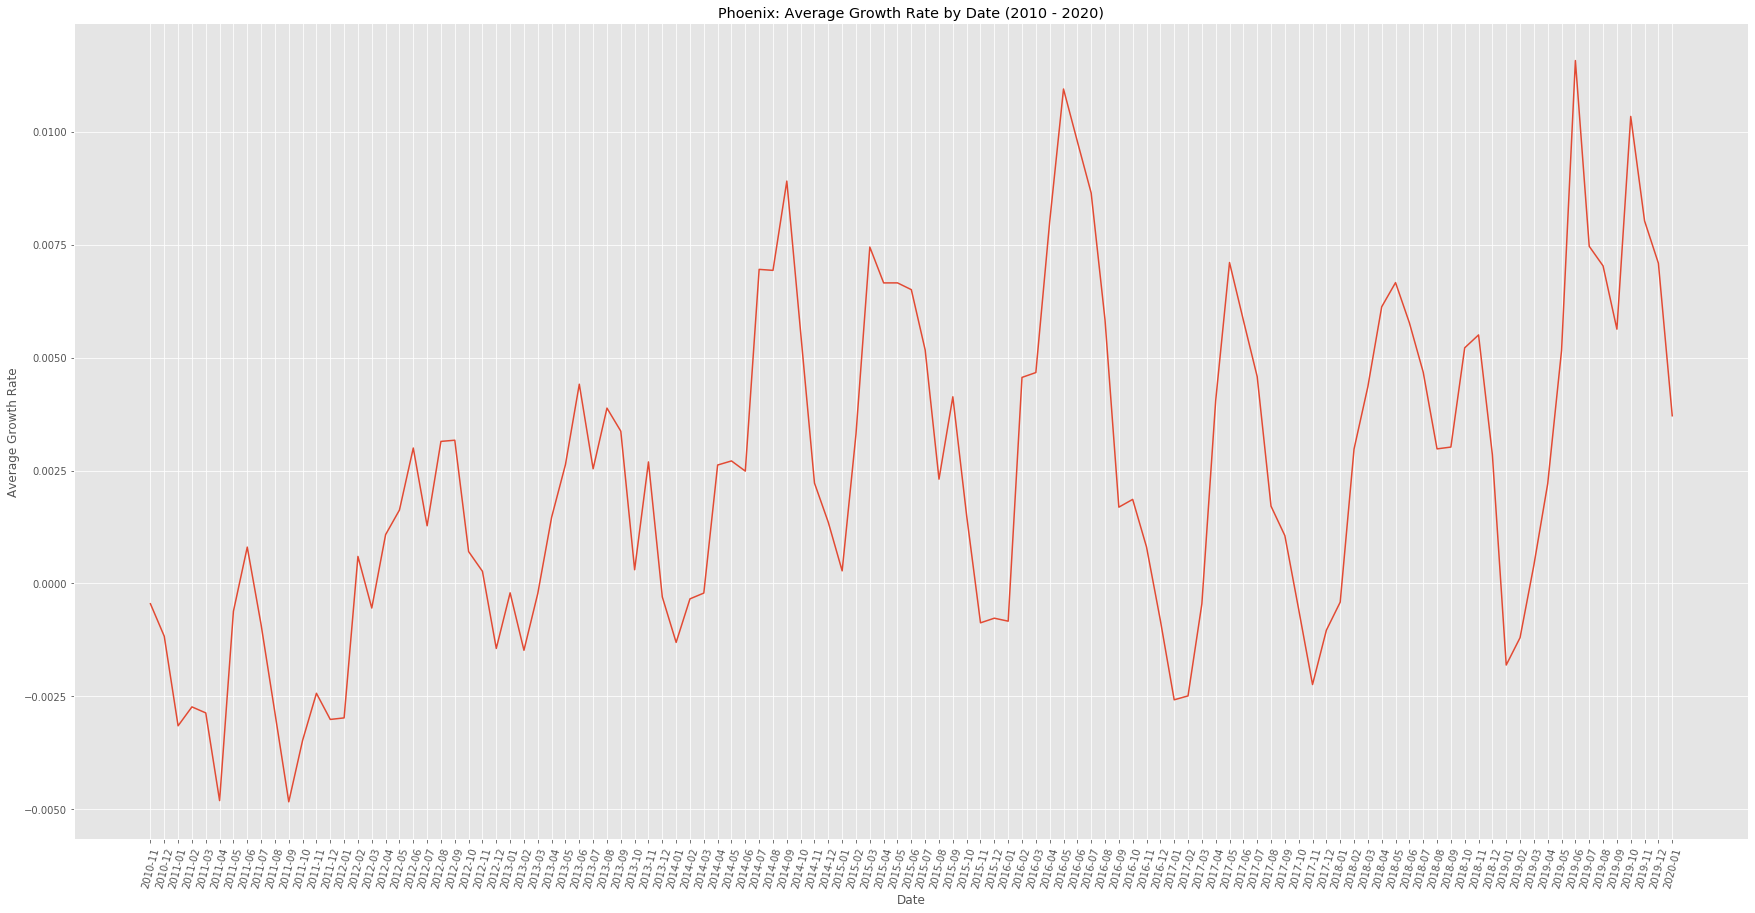

In [196]:
plt.figure(figsize=(30,15))
degrees = 75
plt.xticks(rotation=degrees)
plt.plot(gr_ten.loc[:,"2010-11":'2020-01'].mean())
plt.ylabel("Average Growth Rate")
plt.xlabel("Date")
plt.title("Phoenix: Average Growth Rate by Date (2010 - 2020)");


# ZRI Tampa 

In [191]:
zri_tampa_pre_growthrate = zri_all_tampa.loc[:,['RegionName','2010-09','2010-10','2010-11','2010-12',
                                                    '2011-01', '2011-02', '2011-03', '2011-04', '2011-05','2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11','2011-12',
                                                    '2012-01','2012-02','2012-03','2012-04','2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
                                                    '2013-01','2013-02','2013-03','2013-04','2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
                                                    '2014-01','2014-02','2014-03','2014-04','2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
                                                    '2015-01','2015-02','2015-03','2015-04','2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
                                                   '2016-01','2016-02','2016-03','2016-04','2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
                                                   '2017-01','2017-02','2017-03','2017-04','2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                                                   '2018-01','2018-02','2018-03','2018-04','2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                                                   '2019-01','2019-02','2019-03','2019-04','2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12','2020-01']]
zri_tampa_pre_growthrate = zri_tampa_pre_growthrate.sort_values("RegionName")

In [189]:
zri_tampa_copy = zri_tampa_pre_growthrate.copy()
zri_tampa_copy.head()

RegionName  2010-09  2010-10  2010-11  2010-12  2011-01  2011-02  \
4692       33602   1198.0   1207.0   1220.0   1228.0   1225.0   1234.0   
5647       33603    963.0    969.0    977.0    992.0   1005.0   1010.0   
2005       33604    907.0    929.0    942.0    950.0    957.0    960.0   
6246       33605    911.0    920.0    927.0    928.0    935.0    932.0   
4966       33606   1245.0   1273.0   1303.0   1328.0   1338.0   1347.0   

      2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  2011-10  \
4692   1247.0   1260.0   1265.0   1259.0   1259.0   1267.0   1280.0   1300.0   
5647   1013.0   1016.0   1019.0   1025.0   1022.0   1021.0   1023.0   1017.0   
2005    957.0    952.0    951.0    952.0    951.0    951.0    953.0    952.0   
6246    932.0    932.0    938.0    943.0    945.0    940.0    937.0    941.0   
4966   1359.0   1364.0   1363.0   1359.0   1353.0   1352.0   1352.0   1348.0   

      2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  2012-06  \
4692   1311.0   1320.0   1315.0   1318.0   1316.0   1318.0   1325.0   1330.0   
5647   1010.0    998.0    993.0    993.0    998.0    995.0   1001.0   1007.0   
2005    952.0    951.0    947.0    947.0    951.0    958.0    965.0    973.0   
6246    941.0    940.0    943.0    946.0    942.0    944.0    946.0    945.0   
4966   1348.0   1346.0   1350.0   1361.0   1371.0   1377.0   1391.0   1411.0   

      2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  2013-02  \
4692   1337.0   1350.0   1350.0   1349.0   1341.0   1328.0   1308.0   1295.0   
5647   1008.0   1016.0   1019.0   1016.0   1013.0   1004.0    992.0    991.0   
2005    981.0    989.0    993.0    995.0    996.0    995.0    988.0    974.0   
6246    942.0    941.0    935.0    931.0    931.0    925.0    930.0    922.0   
4966   1429.0   1442.0   1443.0   1440.0   1435.0   1430.0   1425.0   1429.0   

      2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  2013-10  \
4692   1298.0   1315.0   1334.0   1349.0   1367.0   1383.0   1379.0   1380.0   
5647    985.0    973.0    968.0    962.0    964.0    989.0      NaN   1050.0   
2005    959.0    945.0    936.0    932.0    929.0    937.0    947.0    970.0   
6246    922.0    913.0    917.0    929.0    938.0    951.0    966.0    969.0   
4966   1435.0   1449.0   1468.0   1493.0   1503.0   1508.0   1511.0   1503.0   

      2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  2014-06  \
4692   1386.0   1400.0   1398.0   1397.0   1384.0   1379.0   1387.0   1396.0   
5647   1048.0   1054.0   1053.0   1052.0   1063.0   1069.0   1077.0   1078.0   
2005    998.0   1016.0   1023.0   1026.0   1031.0   1038.0   1044.0   1043.0   
6246    980.0    985.0    987.0    987.0    992.0    997.0   1004.0   1014.0   
4966   1498.0   1477.0   1458.0   1448.0   1437.0   1436.0   1442.0   1460.0   

      2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  2015-02  \
4692   1424.0   1451.0   1478.0   1486.0   1492.0   1502.0   1506.0   1515.0   
5647   1079.0   1079.0   1090.0   1096.0   1104.0   1103.0   1099.0   1093.0   
2005   1041.0   1036.0   1040.0   1043.0   1049.0   1045.0   1042.0   1042.0   
6246   1016.0   1011.0   1014.0   1016.0   1020.0   1019.0   1016.0   1013.0   
4966   1504.0   1547.0   1592.0   1612.0   1621.0   1623.0   1628.0   1636.0   

      2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  2015-10  \
4692   1528.0   1547.0   1555.0   1574.0   1602.0   1612.0   1611.0   1596.0   
5647   1081.0   1092.0   1105.0   1128.0   1138.0   1150.0   1166.0   1169.0   
2005   1048.0   1058.0   1074.0   1089.0   1103.0   1116.0   1135.0   1146.0   
6246   1015.0   1023.0   1041.0   1061.0   1075.0   1089.0   1103.0   1112.0   
4966   1652.0   1676.0   1707.0   1736.0   1772.0   1799.0   1837.0   1850.0   

      2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  2016-05  2016-06  \
4692   1572.0   1556.0   1565.0   1584.0   1596.0   1604.0   1600.0   1604.0   
5647   1166.0   1173.0   1180.0   

Plot - Tampa: Average Zri Index by Date (2015 - 2017) #Put both plot together

Text(0.5, 1.0, 'Tampa: Average Zri Index by Date (2015 - 2017)')

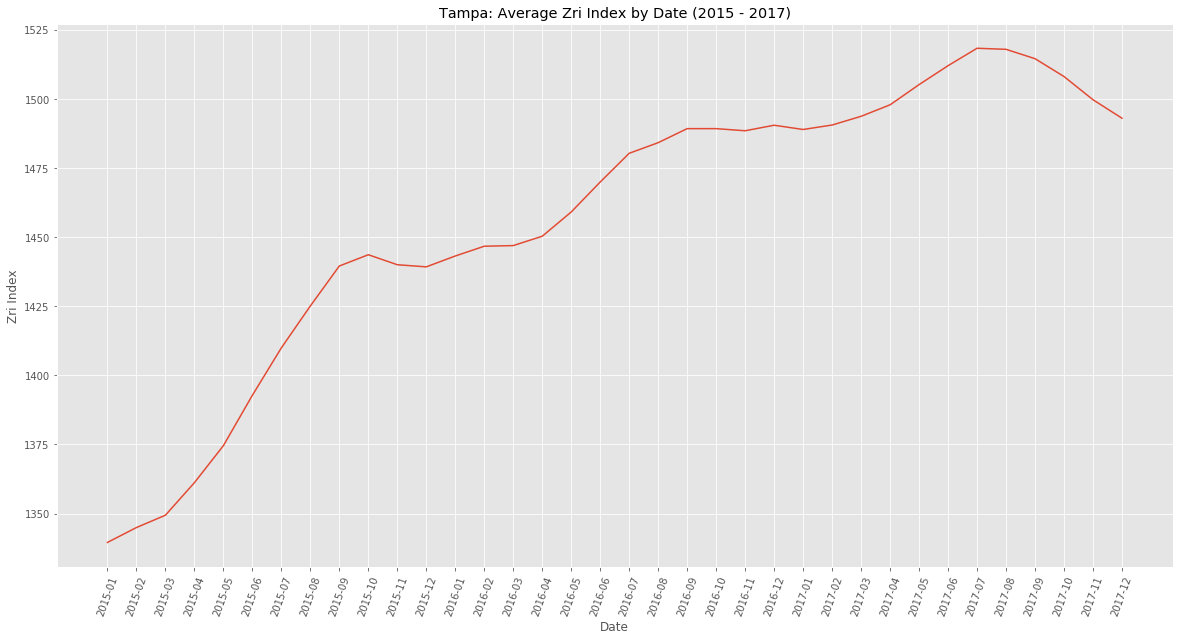

In [190]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_tampa_copy.loc[:,"2015-01":'2017-12'].mean())
plt.ylabel("Zri Index")
plt.xlabel("Date")
plt.title("Tampa: Average Zri Index by Date (2015 - 2017)")

# ZRI Tampa Growthrate

In [139]:
#Growthrate 2015 -2017
zri_tampa_growthrate = zri_tampa_pre_growthrate.loc[:, "2014-12":'2017-12']
zri_tampa_growthrate = zri_tampa_growthrate.T.pct_change()
zri_tampa_growthrate.columns = zri_tampa_pre_growthrate['RegionName']
zri_tampa_growthrate.index.names = ["Date"]
zri_tampa_growthrate = zri_tampa_growthrate.reset_index()
zri_tampa_growthrate = zri_tampa_growthrate.iloc[1:,:]
zri_tampa_growthrate.head()

RegionName     Date     33602     33603     33604     33605     33606  \
1           2015-01  0.002663 -0.003626 -0.002871 -0.002944  0.003081   
2           2015-02  0.005976 -0.005460  0.000000 -0.002953  0.004914   
3           2015-03  0.008581 -0.010979  0.005758  0.001974  0.009780   
4           2015-04  0.012435  0.010176  0.009542  0.007882  0.014528   
5           2015-05  0.005171  0.011905  0.015123  0.017595  0.018496   

RegionName     33607     33609     33610     33611     33612     33616  \
1          -0.006421  0.008114 -0.003880  0.006061  0.000000  0.008468   
2          -0.001616  0.008048  0.000974  0.009789 -0.001942  0.008397   
3          -0.000809  0.006653 -0.001946  0.006711  0.004864  0.001514   
4           0.004049  0.007931  0.012671  0.005926  0.015489  0.008314   
5           0.010484  0.009180  0.014437  0.004418  0.006673  0.013493   

RegionName     33629     33647  
1           0.015527  0.007880  
2           0.010331  0.003127  
3           0.002863  0.002338  
4           0.002447  0.007776  
5           0.002848  0.006173

In [143]:
#Growthrate 2010- 2020 (10 years)
zri_tampa_growthrate_ten = zri_tampa_pre_growthrate.loc[:, "2010-10":'2020-01']
zri_tampa_growthrate_ten = zri_tampa_growthrate_ten.T.pct_change()
zri_tampa_growthrate_ten.columns = zri_tampa_pre_growthrate['RegionName']
zri_tampa_growthrate_ten.index.names = ["Date"]
zri_tampa_growthrate_ten = zri_tampa_growthrate_ten.reset_index()
zri_tampa_growthrate_ten = zri_tampa_growthrate_ten.iloc[1:,:]
zri_tampa_growthrate_ten.head()

RegionName     Date     33602     33603     33604     33605     33606  \
1           2010-11  0.010771  0.008256  0.013994  0.007609  0.023566   
2           2010-12  0.006557  0.015353  0.008493  0.001079  0.019186   
3           2011-01 -0.002443  0.013105  0.007368  0.007543  0.007530   
4           2011-02  0.007347  0.004975  0.003135 -0.003209  0.006726   
5           2011-03  0.010535  0.002970 -0.003125  0.000000  0.008909   

RegionName     33607     33609     33610     33611     33612     33616  \
1           0.009653  0.003155  0.013378 -0.001742  0.010297       NaN   
2           0.000000  0.000000  0.005501 -0.002618  0.003398  0.010811   
3           0.001912  0.004717  0.008753 -0.002625  0.009029  0.007130   
4           0.001908  0.007042  0.001085 -0.004386  0.002237 -0.007080   
5           0.005714  0.009324 -0.002167 -0.001762  0.000000 -0.004456   

RegionName     33629     33647  
1           0.002596  0.005386  
2           0.001554  0.004464  
3          -0.003619 -0.000889  
4          -0.000519  0.008897  
5           0.000519  0.010582

Plot- Zipcode: 33602 - Growth Rate by Date (2015 - 2017)

Text(0.5, 1.0, 'Zipcode: 33602 - Growth Rate by Date (2015 - 2017)')

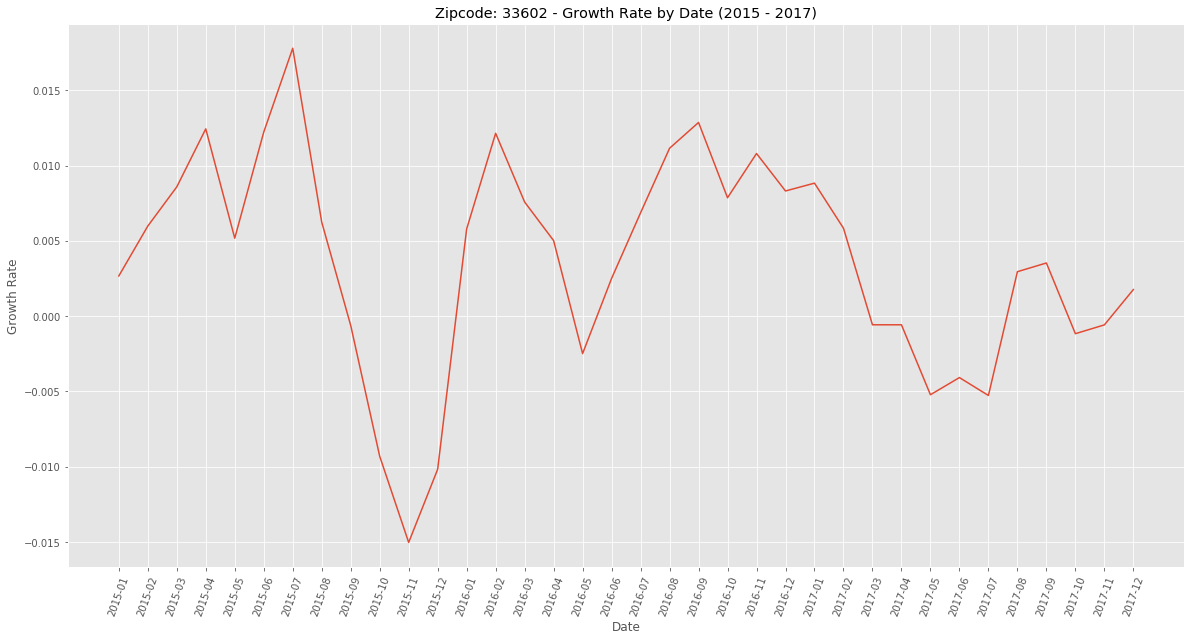

In [197]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_tampa_growthrate['Date'], zri_tampa_growthrate[33602])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 33602 - Growth Rate by Date (2015 - 2017)")

Plot- Zipcode: 33629 - Growth Rate by Date (2015 - 2017)

Text(0.5, 1.0, 'Zipcode: 33602 - Growth Rate by Date (2015 - 2017)')

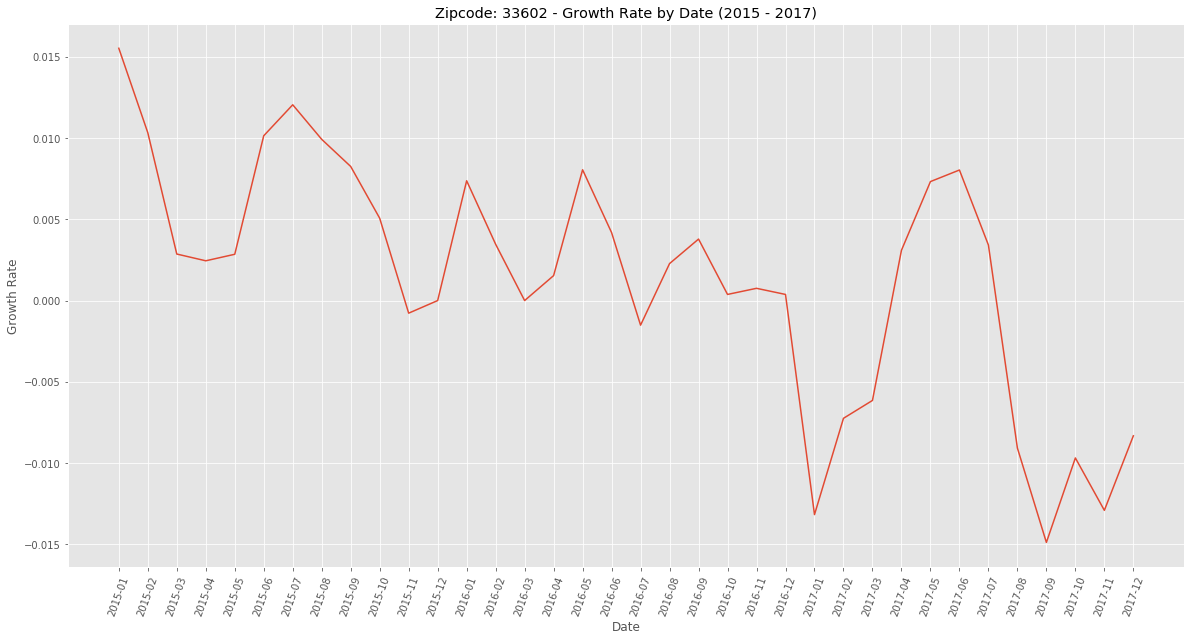

In [141]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_tampa_growthrate['Date'], zri_tampa_growthrate[33629])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 33629 - Growth Rate by Date (2015 - 2017)")

Plot- Zipcode: 33647 - Growth Rate by Date (2015 - 2017)

Text(0.5, 1.0, 'Zipcode: 33602 - Growth Rate by Date (2015 - 2017)')

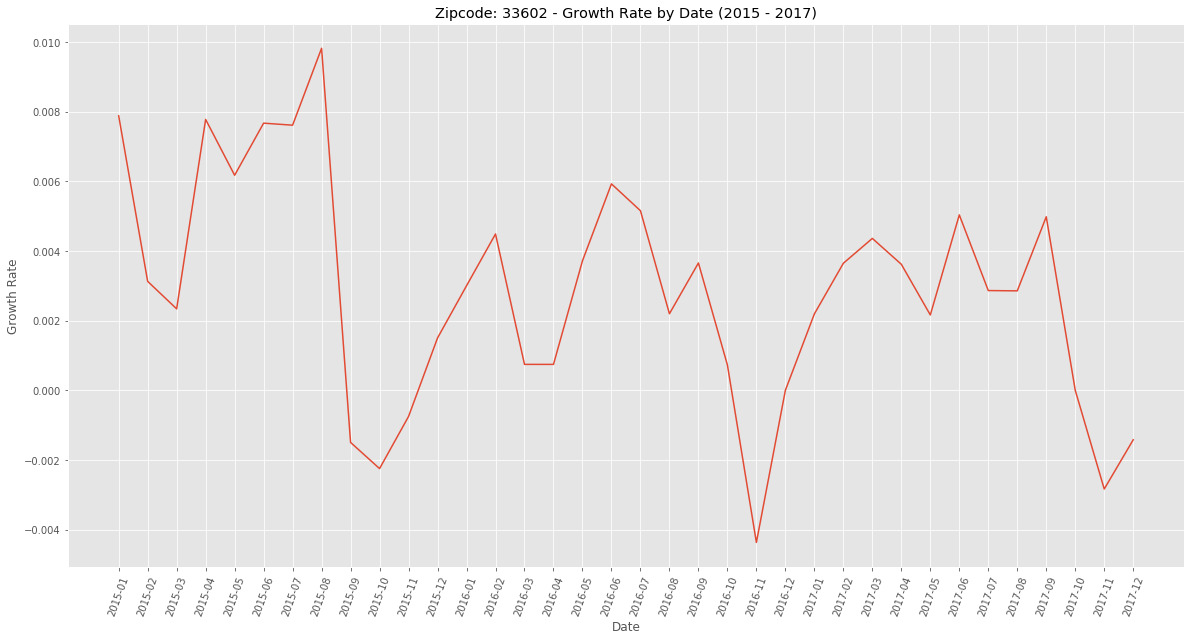

In [142]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_tampa_growthrate['Date'], zri_tampa_growthrate[33647])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 33647 - Growth Rate by Date (2015 - 2017)")

Plot- Average Across Zipcodes : Growth Rate by Date (2010 - 2020)

In [144]:
gr_tampa_ten = zri_tampa_growthrate_ten
gr_tampa_ten = gr_tampa_ten.T
gr_tampa_ten.columns = gr_tampa_ten.iloc[0]
gr_tampa_ten = gr_tampa_ten[1:]
gr_tampa_ten.head()

Date         2010-11   2010-12   2011-01   2011-02   2011-03   2011-04  \
RegionName                                                               
33602       0.010771  0.006557 -0.002443  0.007347  0.010535  0.010425   
33603       0.008256  0.015353  0.013105  0.004975   0.00297  0.002962   
33604       0.013994  0.008493  0.007368  0.003135 -0.003125 -0.005225   
33605       0.007609  0.001079  0.007543 -0.003209       0.0       0.0   
33606       0.023566  0.019186   0.00753  0.006726  0.008909  0.003679   

Date         2011-05   2011-06   2011-07   2011-08   2011-09   2011-10  \
RegionName                                                               
33602       0.003968 -0.004743       0.0  0.006354   0.01026  0.015625   
33603       0.002953  0.005888 -0.002927 -0.000978  0.001959 -0.005865   
33604       -0.00105  0.001052  -0.00105       0.0  0.002103 -0.001049   
33605       0.006438   0.00533  0.002121 -0.005291 -0.003191  0.004269   
33606      -0.000733 -0.002935 -0.004415 -0.000739       0.0 -0.002959   

Date         2011-11   2011-12   2012-01   2012-02   2012-03   2012-04  \
RegionName                                                               
33602       0.008462  0.006865 -0.003788  0.002281 -0.001517   0.00152   
33603      -0.006883 -0.011881  -0.00501       0.0  0.005035 -0.003006   
33604            0.0  -0.00105 -0.004206       0.0  0.004224  0.007361   
33605            0.0 -0.001063  0.003191  0.003181 -0.004228  0.002123   
33606            0.0 -0.001484  0.002972  0.008148  0.007348  0.004376   

Date         2012-05   2012-06   2012-07   2012-08   2012-09   2012-10  \
RegionName                                                               
33602       0.005311  0.003774  0.005263  0.009723       0.0 -0.000741   
33603        0.00603  0.005994  0.000993  0.007937  0.002953 -0.002944   
33604       0.007307   0.00829  0.008222  0.008155  0.004044  0.002014   
33605       0.002119 -0.001057 -0.003175 -0.001062 -0.006376 -0.004278   
33606       0.010167  0.014378  0.012757  0.009097  0.000693 -0.002079   

Date         2012-11   2012-12   2013-01   2013-02   2013-03   2013-04  \
RegionName                                                               
33602       -0.00593 -0.009694  -0.01506 -0.009939  0.002317  0.013097   
33603      -0.002953 -0.008885 -0.011952 -0.001008 -0.006054 -0.012183   
33604       0.001005 -0.001004 -0.007035  -0.01417   -0.0154 -0.014599   
33605            0.0 -0.006445  0.005405 -0.008602       0.0 -0.009761   
33606      -0.003472 -0.003484 -0.003497  0.002807  0.004199  0.009756   

Date         2013-05   2013-06   2013-07   2013-08   2013-09   2013-10  \
RegionName                                                               
33602       0.014449  0.011244  0.013343  0.011704 -0.002892  0.000725   
33603      -0.005139 -0.006198  0.002079  0.025934       0.0  0.061678   
33604      -0.009524 -0.004274 -0.003219  0.008611  0.010672  0.024287   
33605       0.004381  0.013086  0.009688  0.013859  0.015773  0.003106   
33606       0.013112   0.01703  0.006698  0.003327  0.001989 -0.005295   

Date         2013-11   2013-12   2014-01   2014-02   2014-03   2014-04  \
RegionName                                                               
33602       0.004348  0.010101 -0.001429 -0.000715 -0.009306 -0.003613   
33603      -0.001905  0.005725 -0.000949  -0.00095  0.010456  0.005644   
33604       0.028866  0.018036   0.00689  0.002933  0.004873   0.00679   
33605       0.011352  0.005102   0.00203       0.0  0.005066   0.00504   
33606      -0.003327 -0.014019 -0.012864 -0.006859 -0.007597 -0.000696   

Date         2014-05   2014-06   2014-07   2014-08   2014-09   2014-10  \
RegionName                                                               
33602       0.005801  0.006489  0.020057  0.018961  0.018608  0.005413   
33603       0.007484  0.000929  0.000928       0.0  0.010195  0.005505   
33604        0.00578 -0.000958 -0.001918 -0.004803  0.003861  0.002885 

Text(0.5, 1.0, 'Average Growth Rate by Date (2010 - 2020)')

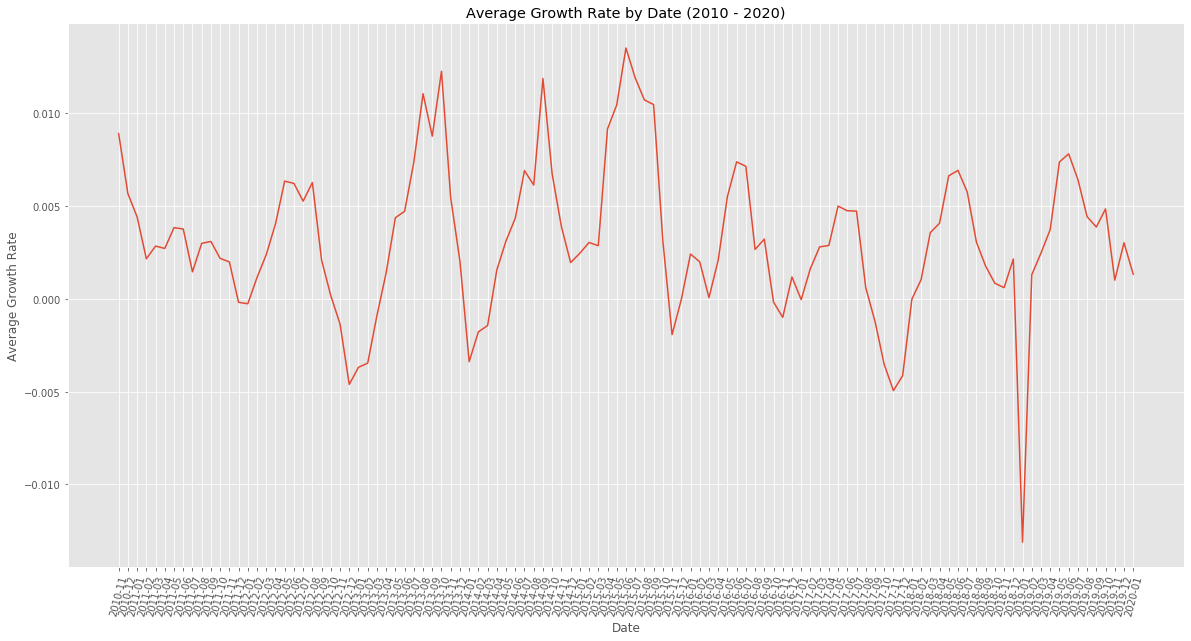

In [145]:
plt.figure(figsize=(20,10))
degrees = 75
plt.xticks(rotation=degrees)
plt.plot(gr_tampa_ten.loc[:,"2010-11":'2020-01'].mean())
plt.ylabel("Average Growth Rate")
plt.xlabel("Date")
plt.title("Tampa: Average Growth Rate by Date (2010 - 2020)")

# ZRI Miami-Dade County (County Level for the Greater City of Miami, includes more cities)

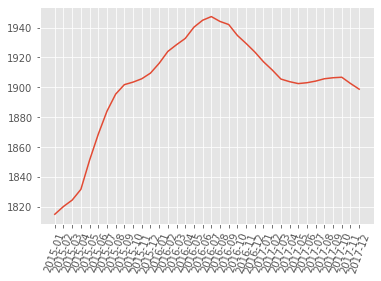

In [48]:
degrees = 70
plt.xticks(rotation=degrees)
zri_all_miamidade  = zri_all[zri_all['CountyName'] == 'Miami-Dade County']
plt.plot(zri_all_miamidade.loc[:,"2015-01":'2017-12'].mean())

# Zip Codes ACS Data 

In [20]:
for col in zip_codes_2015.columns:
    print(col)

geo_id
nonfamily_households
family_households
median_year_structure_built
rent_burden_not_computed
rent_over_50_percent
rent_40_to_50_percent
rent_35_to_40_percent
rent_30_to_35_percent
rent_25_to_30_percent
rent_20_to_25_percent
rent_15_to_20_percent
rent_10_to_15_percent
rent_under_10_percent
total_pop
male_pop
female_pop
median_age
white_pop
black_pop
asian_pop
hispanic_pop
amerindian_pop
other_race_pop
two_or_more_races_pop
not_hispanic_pop
commuters_by_public_transportation
households
median_income
income_per_capita
housing_units
vacant_housing_units
vacant_housing_units_for_rent
vacant_housing_units_for_sale
median_rent
percent_income_spent_on_rent
owner_occupied_housing_units
million_dollar_housing_units
mortgaged_housing_units
families_with_young_children
two_parent_families_with_young_children
two_parents_in_labor_force_families_with_young_children
two_parents_father_in_labor_force_families_with_young_children
two_parents_mother_in_labor_force_families_with_young_children
two_

In [23]:
zip_codes_2015.head()

geo_id nonfamily_households family_households median_year_structure_built  \
0  98304        222.000000000     112.000000000              1974.000000000   
1  22714         74.000000000     304.000000000              1978.000000000   
2  69128         24.000000000      74.000000000              1955.000000000   
3  97908         13.000000000      16.000000000              1939.000000000   
4  37228        503.000000000     132.000000000              2002.000000000   

  rent_burden_not_computed rent_over_50_percent rent_40_to_50_percent  \
0             18.000000000                 0E-9                  0E-9   
1              6.000000000                 0E-9                  0E-9   
2                     0E-9                 0E-9                  0E-9   
3              9.000000000          4.000000000                  0E-9   
4                     0E-9        265.000000000          27.000000000   

  rent_35_to_40_percent rent_30_to_35_percent rent_25_to_30_percent  \
0                  0E-9                  0E-9                  0E-9   
1                  0E-9                  0E-9                  0E-9   
2                  0E-9           3.000000000                  0E-9   
3           2.000000000                  0E-9                  0E-9   
4          98.000000000          57.000000000          33.000000000   

  rent_20_to_25_percent rent_15_to_20_percent rent_10_to_15_percent  \
0          13.000000000          63.000000000          29.000000000   
1                  0E-9           9.000000000          20.000000000   
2           2.000000000           3.000000000                  0E-9   
3           2.000000000                  0E-9                  0E-9   
4          60.000000000          17.000000000          13.000000000   

  rent_under_10_percent       total_pop       male_pop     female_pop  \
0                  0E-9   636.000000000  392.000000000  244.000000000   
1                  0E-9  1102.000000000  518.000000000  584.000000000   
2                  0E-9   189.000000000   84.000000000  105.000000000   
3                  0E-9    54.000000000   26.000000000   28.000000000   
4          49.000000000  1226.000000000  394.000000000  832.000000000   

     median_age      white_pop      black_pop    asian_pop  hispanic_pop  \
0  56.300000000  635.000000000    1.000000000         0E-9          0E-9   
1  44.100000000  845.000000000  133.000000000         0E-9  29.000000000   
2  58.800000000  174.000000000    3.000000000         0E-9  12.000000000   
3  57.300000000   53.000000000           0E-9         0E-9          0E-9   
4  35.500000000  442.000000000  664.000000000  8.000000000   9.000000000   

  amerindian_pop other_race_pop two_or_more_races_pop not_hispanic_pop  \
0           0E-9           0E-9                  0E-9    636.000000000   
1           0E-9           0E-9          95.000000000   1073.000000000   
2           0E-9           0E-9                  0E-9    177.000000000   
3    1.000000000           0E-9                  0E-9     54.000000000   
4    3.000000000   13.000000000          87.000000000   1217.000000000   

  commuters_by_public_transportation     households    median_income  \
0                               0E-9  334.000000000  36746.000000000   
1                               0E-9  378.000000000  74625.000000000   
2                               0E-9   98.000000000  56471.000000000   
3                               0E-9   29.000000000  22321.000000000   
4                               0E-9  635.000000000  15540.000000000   

  income_per_capita  housing_units vacant_housing_units  \
0   24343.000000000  725.000000000        391.000000000   
1   27493.000000000  396.000000000         18.000000000   
2   37742.000000000  146.000000000         48.000000000   
3   20519.000000000   80.000000000         51.000000000   
4   14368.000000000  635.000000000                 0E-9   

  vacant_housing_units_for_rent vacant_housing_units_for_sale    median_rent  \
0                  46.000

In [30]:
zip_codes_2015.isnull().sum()[zip_codes_2015.isnull().sum() > 0]

median_year_structure_built                                      890
median_age                                                       505
median_income                                                   2053
income_per_capita                                                578
median_rent                                                     5880
percent_income_spent_on_rent                                    5298
aggregate_travel_time_to_work                                  12744
renter_occupied_housing_units_paying_cash_median_gross_rent     5689
owner_occupied_housing_units_lower_value_quartile               2879
owner_occupied_housing_units_median_value                       2327
owner_occupied_housing_units_upper_value_quartile               2356
bachelors_degree_2                                               131
different_house_year_ago_different_city                          131
different_house_year_ago_same_city                               131
gini_index                        

Text(0, 0.5, 'Variables')

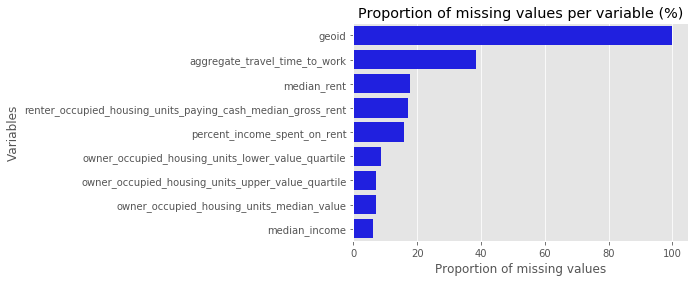

In [28]:
df1 = pd.DataFrame(round(((zip_codes_2015.isna().sum())/zip_codes_2015.shape[0])*100,2)).reset_index()
df1.rename(columns = {'index':'variables', 0:'missing_values'}, inplace = True)
df1 = df1[df1['missing_values'] > 3].sort_values(ascending = False, by = 'missing_values')
sns.barplot(x = 'missing_values', y = 'variables', data = df1, color = 'b')
plt.title('Proportion of missing values per variable (%)', loc = 'center')
plt.xlabel('Proportion of missing values')
plt.ylabel('Variables')

In [68]:
zip_codes_2015['income_per_capita']

0         24343.000000000
1         27493.000000000
2         37742.000000000
3         20519.000000000
4         14368.000000000
5         30673.000000000
6         20058.000000000
7         70911.000000000
8         28892.000000000
9         35806.000000000
10        28149.000000000
11        94587.000000000
12        40555.000000000
13        25846.000000000
14        18684.000000000
15        39607.000000000
16        15784.000000000
17        24192.000000000
18         3855.000000000
19        19807.000000000
20        22399.000000000
21        21976.000000000
22        14588.000000000
23        23961.000000000
24        25663.000000000
25        29696.000000000
26        30302.000000000
27        27960.000000000
28        28039.000000000
29        24219.000000000
30        20110.000000000
31        29800.000000000
32        17231.000000000
33        22787.000000000
34        20099.000000000
35        31421.000000000
36        14668.000000000
37        18389.000000000
38        20

Potential Variables to be Used

In [53]:
zip_codes_2015[['geo_id',
                General Median 
                "median_year_structure_built",                                      
                "median_age",                                                       
                "median_income",                                                   
                "income_per_capita",                                                
                "median_rent" 
                
                    Percent Income 
                    'percent_income_spent_on_rent', 
                    
                    Questionable 
                    'mortgaged_housing_units',
                    'families_with_young_children', 
                    'married_households', 
                    'occupied_housing_units',
                    'housing_units_renter_occupied', 
                    'mobile_homes',
                    'armed_forces', 
                    'civilian_labor_force',
                    'children',
                    
                    Housing Built 
                    'housing_built_2005_or_later',
                    'housing_built_2000_to_2004', 
                    'housing_built_1939_or_earlier', 
                    'households_retirement_income', 
                   
                    
               
                    Employment 
                    'employed_pop', 
                    'unemployed_pop', 
               
                    Labor Force 
                    'not_in_labor_force', 
                    'pop_in_labor_force',
                    
                    
                    
                    Commuters 
                    'commuters_by_bus',
                    'commuters_by_car_truck_van',
                    'commuters_by_carpool',
                    'commuters_by_subway_or_elevated', 
                    'commuters_by_subway_or_elevated', 
                    
                    
                    Different House? 
                    'different_house_year_ago_different_city',
                    'different_house_year_ago_same_city',
                    
                    Employment by Industry 
                    'employed_agriculture_forestry_fishing_hunting_mining',
                    'employed_arts_entertainment_recreation_accommodation_food',
                    'employed_construction',
                    'employed_education_health_social',
                    'employed_finance_insurance_real_estate',
                    'employed_information',
                    'employed_manufacturing',
                    'employed_other_services_not_public_admin',
                    'employed_public_administration',
                    'employed_retail_trade', 
                    'employed_science_management_admin_waste',
                    'employed_transportation_warehousing_utilities', 
                    'employed_wholesale_trade',
                    
                    'female_female_households', 
                    'group_quarters',
                    'households_public_asst_or_food_stamps',
                    'male_male_households',
                    'management_business_sci_arts_employed',
                    'no_cars',
                    'not_us_citizen_pop',
                    'occupation_management_arts', 
                    
                    Cars 
                    'one_car',
                    'two_cars',
                    'three_cars',
                    'four_more_cars'
                    
                    
                    Occuptation
                    'worked_at_home',
                    'occupation_production_transportation_material',
                    'occupation_natural_resources_construction_maintenance'
                    'occupation_sales_office',
                    'occupation_services', 
                    'sales_office_employed',
                    'walked_to_work',
                 
                    Education
                    'associates_degree',
                    'high_school_diploma',
                    'bachelors_degree_2', 
                    'bachelors_degree_or_higher_25_64', 
                    'high_school_including_ged',
                    'bachelors_degree',
                    'graduate_professional_degree',
                    'some_college_and_associates_degree', 
                    'less_one_year_college',
                    'masters_degree',
                    'one_year_more_college', 
                    'in_school',
                    'in_undergrad_college',
                    'less_than_high_school_graduate'
                    
                    groupby regex hispanic
                    'hispanic_any_race',
                    'white_including_hispanic',
                    'black_including_hispanic', 
                    'amerindian_including_hispanic',
                    'asian_including_hispanic',
                    
                    Poverty / Include Gini Index 
                    'gini_index'
                    'pop_determined_poverty_status',
                    'poverty']]
                    
                    

SyntaxError: invalid syntax (<ipython-input-53-a74bfac5d2ef>, line 3)

In [90]:
zip_codes_2015_employment = zip_codes_2015[['employed_pop', 'unemployed_pop', 'not_in_labor_force', 'pop_in_labor_force', 'employed_agriculture_forestry_fishing_hunting_mining',
'employed_arts_entertainment_recreation_accommodation_food','employed_construction','employed_education_health_social',
'employed_finance_insurance_real_estate','employed_information','employed_manufacturing','employed_other_services_not_public_admin',
'employed_public_administration','employed_retail_trade', 'employed_science_management_admin_waste',
    'employed_transportation_warehousing_utilities', 'employed_wholesale_trade']]

Text(0, 0.5, 'bachelors Degree')

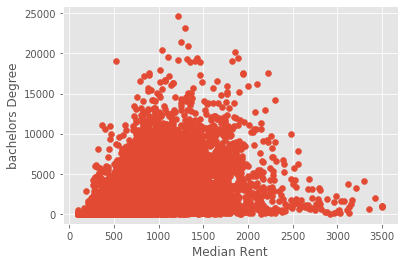

In [66]:
median_rent = zip_codes_2015['median_rent']
bachelors_degree = zip_codes_2015['bachelors_degree']
plt.scatter(median_rent, bachelors_degree)
plt.xlabel("Median Rent")
plt.ylabel("bachelors Degree")

Text(0, 0.5, 'Four + Cars')

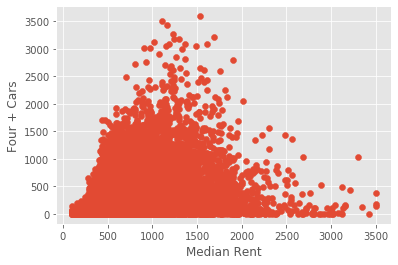

In [67]:
median_rent = zip_codes_2015['median_rent']
four_more_cars = zip_codes_2015['four_more_cars']
plt.scatter(median_rent, four_more_cars)
plt.xlabel("Median Rent")
plt.ylabel("Four + Cars")

In [ ]:
median_rent = zip_codes_2015['median_rent']
four_more_cars = zip_codes_2015['four_more_cars']
plt.scatter(median_rent, four_more_cars)
plt.xlabel("Median Rent")
plt.ylabel("Four + Cars")

In [ ]:
zip_codes_2015['median_rent']

Linear Models Attempt - Not Successful

In [101]:
phoenix_zri_month_2015 = phoenix_zri_monthly.loc[:,'2015-01':'2015-12']
phoenix_zri_month_2015.isnull().sum()[phoenix_zri_month_2015.isnull().sum() > 0]
phoenix_zri_month_2015 = phoenix_zri_month_2015.astype(float)
phoenix_zri_month_2015

2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  \
69      1171.0   1176.0   1185.0   1191.0   1200.0   1207.0   1211.0   1212.0   
483     1145.0   1147.0   1159.0   1163.0   1166.0   1176.0   1181.0   1182.0   
527     1019.0   1023.0   1033.0   1050.0   1058.0   1077.0   1084.0   1078.0   
793     1782.0   1793.0   1812.0   1852.0   1865.0   1871.0   1870.0   1862.0   
896     1297.0   1307.0   1315.0   1328.0   1340.0   1348.0   1359.0   1362.0   
1122    1391.0   1408.0   1423.0   1443.0   1461.0   1468.0   1478.0   1479.0   
1172    1240.0   1246.0   1250.0   1256.0   1267.0   1276.0   1280.0   1279.0   
1189    1000.0   1008.0   1023.0   1035.0   1039.0   1049.0   1052.0   1051.0   
1226    1059.0   1068.0   1086.0   1100.0   1108.0   1121.0   1117.0   1118.0   
1384    1157.0   1160.0   1171.0   1177.0   1185.0   1195.0   1202.0   1206.0   
1492    1134.0   1137.0   1151.0   1157.0   1164.0   1173.0   1174.0   1179.0   
1655    1055.0   1059.0   1077.0   1091.0   1099.0   1111.0   1115.0   1116.0   
1707     965.0    973.0    985.0    990.0    999.0   1010.0   1014.0   1016.0   
1767     956.0    964.0    976.0    985.0    996.0   1007.0   1011.0   1013.0   
1863     983.0    989.0   1007.0   1020.0   1025.0   1033.0   1035.0   1028.0   
2053     934.0    940.0    951.0    963.0    971.0    977.0    982.0    984.0   
2167    1063.0   1068.0   1085.0   1101.0   1102.0   1115.0   1119.0   1114.0   
2278    1014.0   1021.0   1034.0   1047.0   1055.0   1059.0   1068.0   1069.0   
2386    1120.0   1124.0   1135.0   1140.0   1146.0   1155.0   1159.0   1159.0   
2431    1214.0   1224.0   1236.0   1244.0   1255.0   1255.0   1259.0   1268.0   
2672    1226.0   1238.0   1238.0   1242.0   1242.0   1252.0   1242.0   1238.0   
2710    1130.0   1138.0   1152.0   1162.0   1165.0   1176.0   1182.0   1185.0   
2983    1286.0   1287.0   1299.0   1307.0   1320.0   1328.0   1332.0   1334.0   
3043     909.0    910.0    921.0    930.0    942.0    950.0    955.0    950.0   
3259    1680.0   1708.0   1737.0   1769.0   1780.0   1789.0   1790.0   1785.0   
3637     892.0    900.0    911.0    918.0    923.0    933.0    938.0    943.0   
3682    1088.0   1096.0   1107.0   1107.0   1113.0   1125.0   1128.0   1129.0   
3740     950.0    963.0    990.0   1006.0   1011.0   1013.0   1018.0   1018.0   
4030    1135.0   1138.0   1152.0   1157.0   1159.0   1167.0   1171.0   1171.0   
4170    1172.0   1178.0   1188.0   1199.0   1208.0   1216.0   1230.0   1236.0   
4235    1277.0   1286.0   1301.0   1315.0   1330.0   1337.0   1339.0   1339.0   
4413     960.0    965.0    972.0    988.0    997.0   1007.0   1011.0   1009.0   
4964    1046.0   1051.0   1063.0   1081.0   1092.0   1111.0   1115.0   1119.0   
5206     939.0    940.0    949.0    958.0    969.0    979.0    987.0    986.0   
5401    1627.0   1643.0   1647.0   1657.0   1645.0   1630.0   1632.0   1638.0   
5646     892.0    900.0    912.0    910.0    919.0    927.0    922.0    922.0   
5806     995.0   1000.0   1009.0   1018.0   1030.0   1030.0   1043.0   1049.0   
6478    1457.0   1456.0   1475.0   1481.0   1491.0   1490.0   1506.0   1511.0   
6630    1221.0   1233.0   1244.0   1248.0   1252.0   1268.0   1284.0   1296.0   
7689     947.0    951.0    961.0    972.0    984.0    995.0    990.0    996.0   
8188    1154.0   1154.0   1167.0   1175.0   1181.0   1191.0   1196.0   1204.0   
8222    1160.0   1169.0   1190.0   1206.0   1216.0   1227.0   1234.0   1234.0   
8530    1249.0   1251.0   1253.0   1263.0   1280.0   1286.0   1304.0   1309.0   
10104   1443.0      NaN   1497.0   1469.0   1458.0   1488.0      NaN   1570.0   
10690      NaN   1006.0   1009.0   1020.0   1021.0   1037.0   1042.0   1031.0   

       2015-09  2015-10  2015-11  2015-12  
69      1215.0   1221.0   1222.0   1230.0  
483     1185.0   1195.0   1198.0   1206.0  
527     1079.0   1078.0   1070.0   1062.0  
793     1865.0   1855.0   1855.0   1874.0  
896     1378.0   1392.0   1395.0   1395.0  
1122    1495.0  

In [102]:
phoenix_zri_month_2015.isnull().sum()[phoenix_zri_month_2015.isnull().sum() > 0]

2015-01    1
2015-02    1
2015-07    1
dtype: int64

In [95]:
#zip_codes_2015_employment.isnull().sum()[zip_codes_2015_employment.isnull().sum() > 0]
zip_codes_2015_employment = zip_codes_2015_employment.astype(int)

Final ACS Data

In [103]:
acs_final = pd.read_csv("acsfinal.csv", index_col=[0])

In [23]:
acs_final.head()

Year  geo_id  gini_index  income_per_capita  median_age  median_income  \
0  2015   85003      0.5317            30082.0        37.3        41038.0   
1  2015   85004      0.5950            31399.0        35.9        30202.0   
2  2015   85262      0.4994            81380.0        55.3       124848.0   
3  2015   85118      0.4580            43175.0        63.7        62715.0   
4  2015   85631      0.3618            17884.0        33.9        43629.0   

   married_households  family_households  nonfamily_households  \
0               957.0             1467.0                2478.0   
1               272.0              500.0                1525.0   
2              3323.0             3568.0                 920.0   
3              3830.0             4074.0                1612.0   
4               658.0              975.0                 343.0   

   unemployed_pop  employed_pop  owner_occupied_housing_units  \
0           377.0        4081.0                        1247.0   
1           194.0        2198.0                         577.0   
2           267.0        4539.0                        4134.0   
3           423.0        3589.0                        4969.0   
4           299.0        1341.0                         918.0   

   owner_occupied_housing_units_lower_value_quartile  \
0                                           161000.0   
1                                            98200.0   
2                                           442900.0   
3                                           156400.0   
4                                            56800.0   

   owner_occupied_housing_units_median_value  \
0                                   288500.0   
1                                   238300.0   
2                                   649500.0   
3                                   245500.0   
4                                    73600.0   

   owner_occupied_housing_units_upper_value_quartile  vacant_housing_units  \
0                                           387000.0                 886.0   
1                                           342300.0                 769.0   
2                                           982400.0                2766.0   
3                                           351200.0                2608.0   
4                                            94600.0                 298.0   

   vacant_housing_units_for_rent  vacant_housing_units_for_sale  \
0                          396.0                           58.0   
1                          250.0                          225.0   
2                           88.0                          299.0   
3                           88.0                           11.0   
4                           38.0                            0.0   

   public_commute  personal_commute  college_educated  in_school  \
0           622.0            5658.0           10370.0      986.0   
1           244.0            2586.0            5564.0      223.0   
2             0.0            6936.0           17548.0     1021.0   
3             0.0            5878.0           15431.0      711.0   
4             2.0            2476.0            2892.0      830.0   

   less_than_college_educated  high_school_educated  asian_pop  \
0                       570.0                2343.0      200.0   
1                       564.0                1394.0      118.0   
2                       924.0                1808.0      466.0   
3                      2422.0                5063.0      248.0   
4                       382.0                1373.0        0.0   

   amerindian_pop  black_pop  hispanic_pop  white_pop  \
0           126.0      992.0        3461.0     4542.0   
1            51.0      337.0        1461.0     2588.0   
2            48.0      247.0         118.0     9318.0   
3             8.0       93.0         639.0    10759.0   
4             0.0        2.0        2343.0     1680.0   

   amerindian_including_hispanic  other_race_pop  two_or_more_races_pop  \
0                          157

# ZRI Phoenix Correlation Map

In [153]:
transpose_zri = zri_phoenix_growthrate.copy()
transpose_zri = transpose_zri.set_index('Date').T
transpose_zri = transpose_zri.reset_index()
# #transpose_zri['Year'] = pd.DatetimeIndex(transpose_zri['Date']).year

In [154]:
transpose_zri

Date         2015-01   2015-02   2015-03   2015-04   2015-05   2015-06  \
RegionName                                                               
85003      -0.005146  0.007759  0.017964  0.013445  0.008292  0.009046   
85004      -0.005172  0.000000  0.011265  0.006855  0.005106  0.008467   
85006       0.000000  0.004780  0.011418  0.016933  0.010176  0.017399   
85007       0.003178  0.004224  0.010515  0.011446  0.012346  0.011179   
85008       0.000982  0.003925  0.009775  0.016457  0.007619  0.017958   
85009       0.004420  0.001100  0.012088  0.009772  0.012903  0.008493   
85012       0.004019  0.001601  0.001599  0.007981  0.013460  0.004687   
85013       0.004284  0.005119  0.008489  0.009259  0.007506  0.006623   
85014       0.000886  0.007080  0.012302  0.008681  0.002582  0.009442   
85015       0.005208  0.008290  0.012333  0.005076  0.009091  0.011011   
85016       0.002318  0.007710  0.006121  0.009886  0.009036  0.005970   
85017       0.004505  0.008969  0.012222  0.007684  0.005447  0.010834   
85018       0.004332  0.012221  0.010653  0.014055  0.012474  0.004791   
85019      -0.005000  0.005025  0.009000  0.008920  0.011788  0.000000   
85020       0.000000  0.002593  0.009483  0.005124  0.006797  0.008439   
85021       0.000883  0.002646  0.012313  0.005213  0.006050  0.007732   
85022      -0.000873  0.001747  0.010462  0.003451  0.002580  0.008576   
85023       0.002686  0.003571  0.009786  0.004405  0.005263  0.007853   
85024       0.005314  0.002643  0.012302  0.004340  0.001729  0.006903   
85027       0.004762  0.003791  0.016997  0.012999  0.007333  0.010919   
85028      -0.001840  0.009834  0.002435  0.006072 -0.007242 -0.009119   
85029       0.006036  0.008000  0.014881  0.011730  0.003865  0.009625   
85031       0.012486  0.008969  0.013333 -0.002193  0.009890  0.008705   
85032      -0.000853  0.004270  0.007653  0.005063  0.007557  0.005833   
85033       0.005112  0.006104  0.018200  0.012910  0.004902  0.007805   
85034       0.000000 -0.048250  0.002982  0.010902  0.000980  0.015671   
85035       0.005382  0.006424  0.011702  0.012618  0.008307  0.006179   
85037       0.001976  0.006903  0.012733  0.012573  0.007641  0.003791   
85040       0.001043  0.005208  0.007254  0.016461  0.009109  0.010030   
85041       0.001892  0.008499  0.016854  0.012891  0.007273  0.011733   
85042       0.001885  0.004704  0.015918  0.014747  0.000908  0.011797   
85043       0.001066  0.001065  0.009574  0.009484  0.011482  0.010320   
85044       0.002425  0.004839  0.003210  0.004800  0.008758  0.007103   
85045      -0.002075  0.000000  0.037422 -0.018704 -0.007488  0.020576   
85048       0.009053  0.009788  0.000000  0.003231  0.000000  0.008052   
85050      -0.003873  0.000778  0.009324  0.006159  0.009946  0.006061   
85051       0.003148  0.008368  0.012448  0.009221  0.011168  0.011044   
85053      -0.003663  0.007353  0.010036  0.000000  0.005420  0.010782   
85083       0.002463  0.009828  0.008921  0.003215  0.003205  0.012780   
85085            NaN  0.007048  0.011664  0.010761  0.011407  0.005263   
85086      -0.006677  0.010456  0.025129  0.007931  0.005007  0.012100   
85087      -0.010497  0.007072  0.026685  0.022572  0.018729  0.012475   
85118       0.010999  0.010879  0.006278  0.003565 -0.002664  0.001781   
85119      -0.005455 -0.002742 -0.002750 -0.000919 -0.000920  0.001842   
85120      -0.012464 -0.006796 -0.004888 -0.001965  0.003937  0.007843   
85122      -0.005274  0.005302  0.007384  0.007330  0.007277  0.010320   
85123      -0.008159 -0.004700 -0.004723  0.005931  0.010613  0.005834   
85128       0.000000  0.001149  0.003444  0.005721  0.009101  0.011274   
85131       0.003440  0.004571  0.005688  0.002262  0.007901  0.005599   
85132       0.005495  0.006557  0.004343  0.008649  0.010718  0.010604   
85138      -0.004090  0.000000  0.002053  0.005123  0.006116  0.006079   
85139      -0.002215 -0.002220  0.002225 -0.001110  0.003333  0.009967   
8514

In [148]:
valueCols=[col for col in transpose_zri.columns if '20' in col] #columns with the indices
indexCols=[col for col in transpose_zri.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(transpose_zri, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri_growthrate")


In [198]:
zri_long['Year'] = pd.DatetimeIndex(zri_long['year_month']).year
zri_long['Quarter'] = pd.DatetimeIndex(zri_long['year_month']).quarter
zri_long['Month'] = pd.DatetimeIndex(zri_long['year_month']).month
zri_long.columns = zri_long.columns.str.replace('RegionName', 'geo_id')
zri_long

geo_id year_month  zri_growthrate  Year  Quarter  Month
0      85003    2015-01       -0.005146  2015        1      1
1      85004    2015-01       -0.005172  2015        1      1
2      85006    2015-01        0.000000  2015        1      1
3      85007    2015-01        0.003178  2015        1      1
4      85008    2015-01        0.000982  2015        1      1
5      85009    2015-01        0.004420  2015        1      1
6      85012    2015-01        0.004019  2015        1      1
7      85013    2015-01        0.004284  2015        1      1
8      85014    2015-01        0.000886  2015        1      1
9      85015    2015-01        0.005208  2015        1      1
10     85016    2015-01        0.002318  2015        1      1
11     85017    2015-01        0.004505  2015        1      1
12     85018    2015-01        0.004332  2015        1      1
13     85019    2015-01       -0.005000  2015        1      1
14     85020    2015-01        0.000000  2015        1      1
15     85021    2015-01        0.000883  2015        1      1
16     85022    2015-01       -0.000873  2015        1      1
17     85023    2015-01        0.002686  2015        1      1
18     85024    2015-01        0.005314  2015        1      1
19     85027    2015-01        0.004762  2015        1      1
20     85028    2015-01       -0.001840  2015        1      1
21     85029    2015-01        0.006036  2015        1      1
22     85031    2015-01        0.012486  2015        1      1
23     85032    2015-01       -0.000853  2015        1      1
24     85033    2015-01        0.005112  2015        1      1
25     85034    2015-01        0.000000  2015        1      1
26     85035    2015-01        0.005382  2015        1      1
27     85037    2015-01        0.001976  2015        1      1
28     85040    2015-01        0.001043  2015        1      1
29     85041    2015-01        0.001892  2015        1      1
30     85042    2015-01        0.001885  2015        1      1
31     85043    2015-01        0.001066  2015        1      1
32     85044    2015-01        0.002425  2015        1      1
33     85045    2015-01       -0.002075  2015        1      1
34     85048    2015-01        0.009053  2015        1      1
35     85050    2015-01       -0.003873  2015        1      1
36     85051    2015-01        0.003148  2015        1      1
37     85053    2015-01       -0.003663  2015        1      1
38     85083    2015-01        0.002463  2015        1      1
39     85085    2015-01             NaN  2015        1      1
40     85086    2015-01       -0.006677  2015        1      1
41     85087    2015-01       -0.010497  2015        1      1
42     85118    2015-01        0.010999  2015        1      1
43     85119    2015-01       -0.005455  2015        1      1
44     85120    2015-01       -0.012464  2015        1      1
45     85122    2015-01       -0.005274  2015        1      1
46     85123    2015-01       -0.008159  2015        1      1
47     85128    2015-01        0.000000  2015        1      1
48     85131    2015-01        0.003440  2015        1      1
49     85132    2015-01        0.005495  2015        1      1
50     85138    2015-01       -0.004090  2015        1      1
51     85139    2015-01       -0.002215  2015        1      1
52     85140    2015-01       -0.013310  2015        1      1
53     85142    2015-01        0.003879  2015        1      1
54     85143    2015-01       -0.008712  2015        1      1
55     85173    2015-01        0.002265  2015        1      1
56     85194    2015-01        0.001984  2015        1      1
57     85201    2015-01        0.002874  2015        1      1
58     85202    2015-01       -0.000935  2015        1      1
59     85203    2015-01        0.008197  2015        1      1
60     85204    2015-01        0.005660  2015        1      1
61     85205    2015-01        0.002838  2015        1      1
62     85206    2015-01        0.004456  2015        1      1
63     85207    2015-01        0.00542

In [199]:
result = pd.merge(zri_long, acs_final, how="inner", on=["geo_id", "Year"])

In [200]:
result = result.drop(columns=['year_month'])

In [201]:
zri_long.head()

geo_id year_month  zri_growthrate  Year  Quarter  Month
0   85003    2015-01       -0.005146  2015        1      1
1   85004    2015-01       -0.005172  2015        1      1
2   85006    2015-01        0.000000  2015        1      1
3   85007    2015-01        0.003178  2015        1      1
4   85008    2015-01        0.000982  2015        1      1

In [62]:
acs_final.head()

Year  geo_id  gini_index  income_per_capita  median_age  median_income  \
0  2015   85003      0.5317            30082.0        37.3        41038.0   
1  2015   85004      0.5950            31399.0        35.9        30202.0   
2  2015   85262      0.4994            81380.0        55.3       124848.0   
3  2015   85118      0.4580            43175.0        63.7        62715.0   
4  2015   85631      0.3618            17884.0        33.9        43629.0   

   married_households  family_households  nonfamily_households  \
0               957.0             1467.0                2478.0   
1               272.0              500.0                1525.0   
2              3323.0             3568.0                 920.0   
3              3830.0             4074.0                1612.0   
4               658.0              975.0                 343.0   

   unemployed_pop  employed_pop  owner_occupied_housing_units  \
0           377.0        4081.0                        1247.0   
1           194.0        2198.0                         577.0   
2           267.0        4539.0                        4134.0   
3           423.0        3589.0                        4969.0   
4           299.0        1341.0                         918.0   

   owner_occupied_housing_units_lower_value_quartile  \
0                                           161000.0   
1                                            98200.0   
2                                           442900.0   
3                                           156400.0   
4                                            56800.0   

   owner_occupied_housing_units_median_value  \
0                                   288500.0   
1                                   238300.0   
2                                   649500.0   
3                                   245500.0   
4                                    73600.0   

   owner_occupied_housing_units_upper_value_quartile  vacant_housing_units  \
0                                           387000.0                 886.0   
1                                           342300.0                 769.0   
2                                           982400.0                2766.0   
3                                           351200.0                2608.0   
4                                            94600.0                 298.0   

   vacant_housing_units_for_rent  vacant_housing_units_for_sale  \
0                          396.0                           58.0   
1                          250.0                          225.0   
2                           88.0                          299.0   
3                           88.0                           11.0   
4                           38.0                            0.0   

   public_commute  personal_commute  college_educated  in_school  \
0           622.0            5658.0           10370.0      986.0   
1           244.0            2586.0            5564.0      223.0   
2             0.0            6936.0           17548.0     1021.0   
3             0.0            5878.0           15431.0      711.0   
4             2.0            2476.0            2892.0      830.0   

   less_than_college_educated  high_school_educated  asian_pop  \
0                       570.0                2343.0      200.0   
1                       564.0                1394.0      118.0   
2                       924.0                1808.0      466.0   
3                      2422.0                5063.0      248.0   
4                       382.0                1373.0        0.0   

   amerindian_pop  black_pop  hispanic_pop  white_pop  \
0           126.0      992.0        3461.0     4542.0   
1            51.0      337.0        1461.0     2588.0   
2            48.0      247.0         118.0     9318.0   
3             8.0       93.0         639.0    10759.0   
4             0.0        2.0        2343.0     1680.0   

   amerindian_including_hispanic  other_race_pop  two_or_more_races_pop  \
0                          157

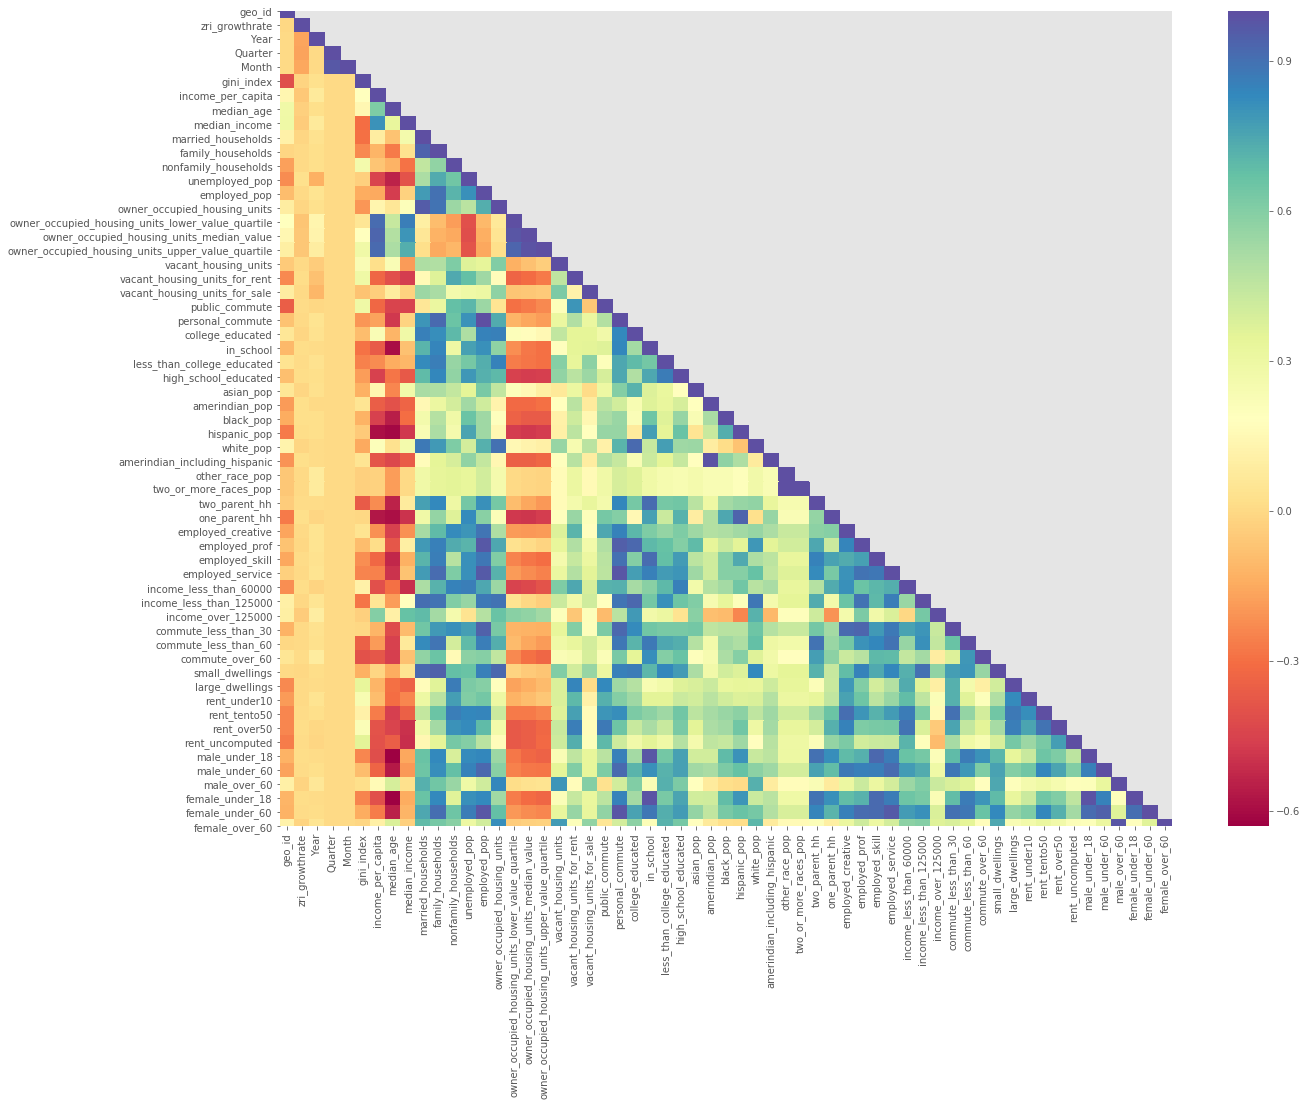

In [202]:
corr_df =  result.corr(method='pearson') 

df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

plt.subplots(figsize=(20,15))
hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap; 

Ten Year Correlation Map of Phoenix 

In [173]:
transpose_10_zri = zri_phoenix_growthrate_ten.copy()
transpose_10_zri = transpose_10_zri.set_index('Date').T
transpose_10_zri = transpose_10_zri.reset_index()
# #transpose_zri['Year'] = pd.DatetimeIndex(transpose_zri['Date']).year
transpose_10_zri.head()

Date  RegionName   2010-11   2010-12   2011-01   2011-02   2011-03   2011-04  \
0          85003 -0.026316  0.001744 -0.014795  0.012367  0.027923  0.007640   
1          85004 -0.004730 -0.003802  0.002863  0.000951  0.006654  0.003777   
2          85006 -0.003264 -0.002183 -0.003282 -0.002195  0.003300  0.002193   
3          85007  0.008102  0.003444 -0.005721  0.000000  0.003452 -0.002294   
4          85008  0.003367 -0.002237 -0.004484 -0.003378  0.004520  0.002250   

Date   2011-05   2011-06   2011-07   2011-08   2011-09   2011-10   2011-11  \
0     0.002527  0.014286  0.000000 -0.018227 -0.013502 -0.013687 -0.005204   
1     0.008467  0.006530  0.005561 -0.003687 -0.005550 -0.011163 -0.014111   
2     0.005470  0.004353 -0.002167 -0.002172 -0.004353 -0.007650 -0.009912   
3     0.005747  0.004571 -0.002275 -0.001140 -0.005708 -0.005741 -0.006928   
4     0.006734  0.000000  0.001115  0.000000 -0.004454 -0.006711 -0.003378   

Date   2011-12   2012-01   2012-02   2012-03   2012-04   2012-05   2012-06  \
0    -0.000872 -0.011344  0.001765  0.015859  0.001735 -0.021645 -0.014159   
1    -0.007634 -0.002885 -0.002893  0.000000  0.003868 -0.000963  0.002893   
2    -0.006674  0.000000 -0.003359  0.001124  0.001122  0.003363  0.005587   
3    -0.005814 -0.005848 -0.004706  0.000000 -0.001182  0.003550  0.003538   
4    -0.002260  0.001133  0.002262 -0.001129  0.000000 -0.001130  0.000000   

Date   2012-07   2012-08   2012-09   2012-10   2012-11   2012-12   2013-01  \
0    -0.028725  0.004621  0.002760  0.001835  0.000916 -0.014639 -0.020427   
1    -0.000962 -0.004812 -0.002901  0.000970  0.000000  0.006783  0.000000   
2     0.000000  0.001111 -0.002220  0.000000  0.000000 -0.001112 -0.006682   
3     0.000000 -0.001175 -0.001176  0.001178  0.001176 -0.001175  0.001176   
4     0.001131  0.001130  0.000000  0.001129 -0.001127  0.000000 -0.001129   

Date   2013-02   2013-03   2013-04   2013-05   2013-06   2013-07   2013-08  \
0    -0.000948  0.004744  0.016053 -0.001859  0.007449 -0.006470  0.000000   
1    -0.003850  0.004831  0.005769  0.003824  0.010476  0.014138  0.011152   
2    -0.007848  0.000000  0.007910 -0.001121  0.019080  0.012115  0.009793   
3    -0.001175 -0.002353  0.004717  0.003521  0.004678  0.004657  0.009270   
4    -0.003390  0.000000  0.003401  0.011299  0.013408  0.007718  0.003282   

Date   2013-09   2013-10   2013-11   2013-12   2014-01   2014-02   2014-03  \
0     0.000000  0.092093 -0.002555 -0.005978  0.000000 -0.058419 -0.002737   
1    -0.001838 -0.006446  0.003707  0.003693  0.003680  0.000917  0.009158   
2     0.010776  0.006397  0.007415  0.004206 -0.004188 -0.002103  0.009484   
3     0.008037 -0.001139 -0.002281  0.001143 -0.002283 -0.001144  0.009164   
4     0.003272  0.006522  0.008639  0.003212 -0.001067  0.000000  0.007479   

Date   2014-04   2014-05   2014-06   2014-07   2014-08   2014-09   2014-10  \
0     0.008234  0.007260 -0.003604  0.022604  0.006189  0.007909  0.010462   
1     0.008167  0.008101  0.000000  0.010714  0.012367  0.007853  0.008658   
2     0.011482  0.015480  0.001016  0.008122  0.018127  0.023739  0.009662   
3     0.007946  0.009009  0.003348  0.012236  0.008791  0.016340  0.015005   
4     0.007423  0.006316  0.004184  0.015625  0.012308  0.015198  0.008982   

Date   2014-11   2014-12   2015-01   2015-02   2015-03   2015-04   2015-05  \
0     0.006903 -0.000857 -0.005146  0.007759  0.017964  0.013445  0.008292   
1    -0.001717 -0.002580 -0.005172  0.000000  0.011265  0.006855  0.005106   
2     0.000957  0.000000  0.000000  0.004780  0.011418  0.016933  0.010176   
3    -0.005280  0.002123  0.003178  0.004224  0.010515  0.011446  0.012346   
4     0.002967  0.003945  0.000982  0.003925  0.009775  0.016457  0.007619   

Date   2015-06   2015-07   2015-08   2015-09   2015-10   2015-11   2015-12  \
0     0.009046  0.005705  0.000000  0.008104  0.000804 -0.004819 -0.001614   
1     0.008467  0.004198  0.006689  0.004153  0.003309 -0.004122  0.002483   
2 

In [174]:
valueCols=[col for col in transpose_10_zri.columns if '20' in col] #columns with the indices
indexCols=[col for col in transpose_10_zri.columns if '20' not in col] #columns without the indices
zri_long_1b=pd.melt(transpose_10_zri, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri_growthrate")

In [175]:
zri_long_1b['Year'] = pd.DatetimeIndex(zri_long_1b['year_month']).year
zri_long_1b['Quarter'] = pd.DatetimeIndex(zri_long_1b['year_month']).quarter
zri_long_1b.columns = zri_long_1b.columns.str.replace('RegionName', 'geo_id')
zri_long_1b.head()

geo_id year_month  zri_growthrate  Year  Quarter
0   85003    2010-11       -0.026316  2010        4
1   85004    2010-11       -0.004730  2010        4
2   85006    2010-11       -0.003264  2010        4
3   85007    2010-11        0.008102  2010        4
4   85008    2010-11        0.003367  2010        4

In [176]:
result1b = pd.merge(zri_long_1b, acs_final, how="inner", on=["geo_id", "Year"])

In [177]:
result1b = result1b.drop(columns=['year_month'])

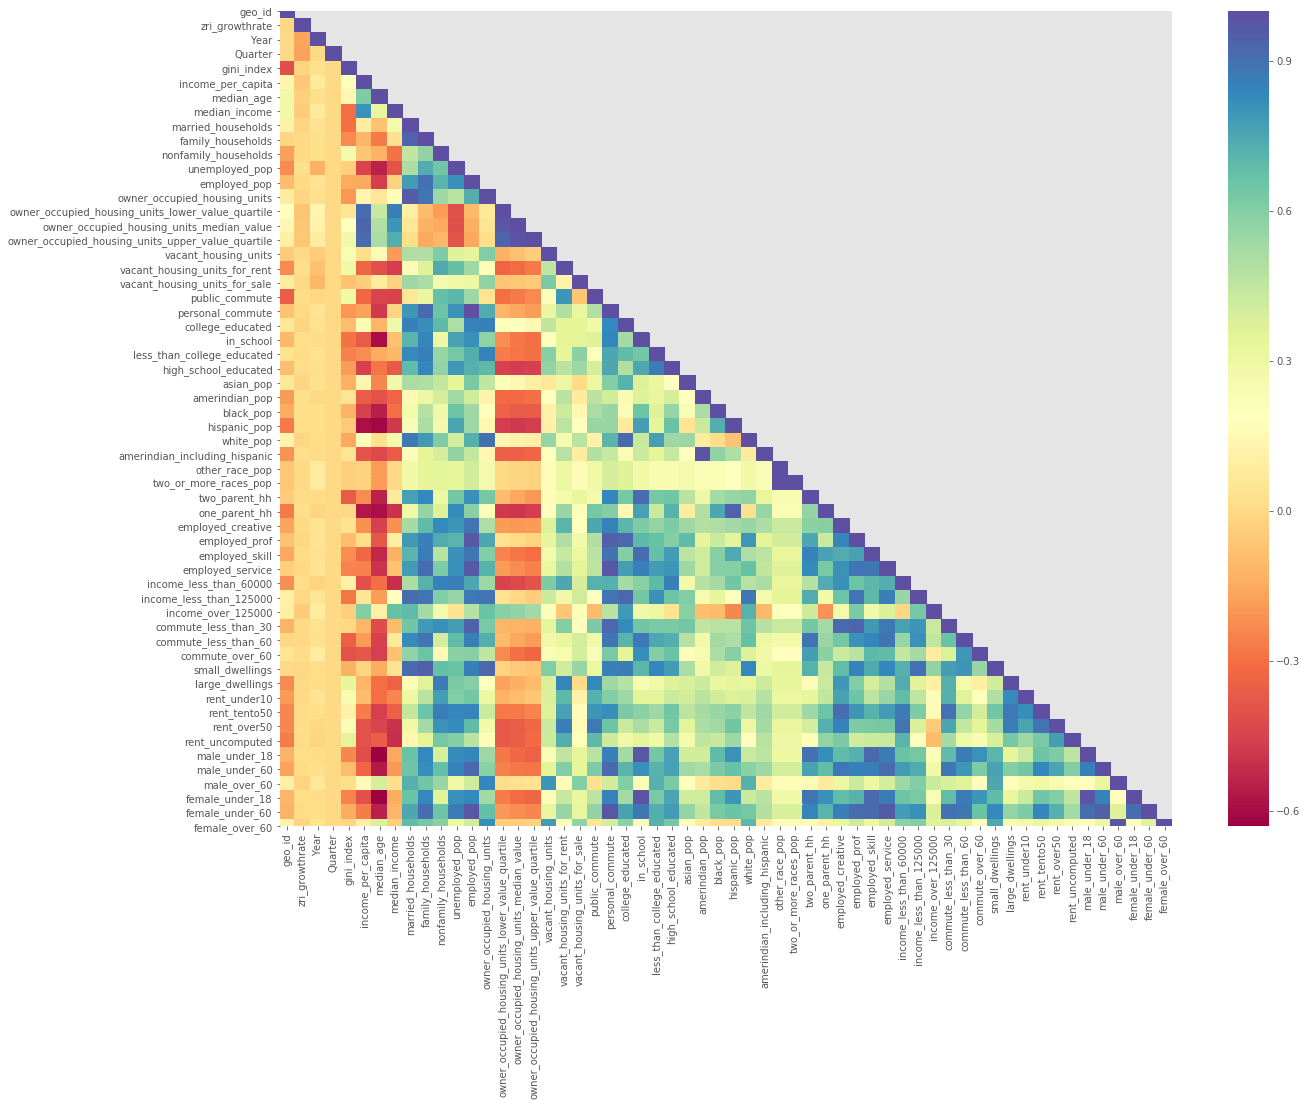

In [178]:
corr_df1b =  result1b.corr(method='pearson') 

df_lt1b = corr_df1b.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

plt.subplots(figsize=(20,15))
hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap; 

# ZRI Tampa Correlation Map

In [159]:
transpose_tampa_zri = zri_tampa_growthrate.copy()
transpose_tampa_zri = transpose_tampa_zri.set_index('Date').T
transpose_tampa_zri = transpose_tampa_zri.reset_index()
#transpose_zri['Year'] = pd.DatetimeIndex(transpose_zri['Date']).year

In [160]:
transpose_tampa_zri

Date  RegionName   2015-01   2015-02   2015-03   2015-04   2015-05   2015-06  \
0          33602  0.002663  0.005976  0.008581  0.012435  0.005171  0.012219   
1          33603 -0.003626 -0.005460 -0.010979  0.010176  0.011905  0.020814   
2          33604 -0.002871  0.000000  0.005758  0.009542  0.015123  0.013966   
3          33605 -0.002944 -0.002953  0.001974  0.007882  0.017595  0.019212   
4          33606  0.003081  0.004914  0.009780  0.014528  0.018496  0.016989   
5          33607 -0.006421 -0.001616 -0.000809  0.004049  0.010484  0.012769   
6          33609  0.008114  0.008048  0.006653  0.007931  0.009180  0.018843   
7          33610 -0.003880  0.000974 -0.001946  0.012671  0.014437  0.015180   
8          33611  0.006061  0.009789  0.006711  0.005926  0.004418  0.008065   
9          33612  0.000000 -0.001942  0.004864  0.015489  0.006673  0.010417   
10         33616  0.008468  0.008397  0.001514  0.008314  0.013493  0.009615   
11         33629  0.015527  0.010331  0.002863  0.002447  0.002848  0.010142   
12         33647  0.007880  0.003127  0.002338  0.007776  0.006173  0.007669   

Date   2015-07   2015-08   2015-09   2015-10   2015-11   2015-12   2016-01  \
0     0.017789  0.006242 -0.000620 -0.009311 -0.015038 -0.010178  0.005784   
1     0.008865  0.010545  0.013913  0.002573 -0.002566  0.006003  0.005968   
2     0.012856  0.011786  0.017025  0.009692  0.006108  0.005204  0.004314   
3     0.013195  0.013023  0.012856  0.008160 -0.000899 -0.002700 -0.002708   
4     0.020737  0.015237  0.021123  0.007077 -0.009189 -0.004910  0.002193   
5     0.009456  0.007026  0.003876  0.002317 -0.002311  0.000000 -0.000772   
6     0.018495  0.013776  0.008647 -0.004287 -0.010455 -0.008701 -0.001254   
7     0.010280  0.013876  0.018248  0.008065  0.000889  0.001776  0.004433   
8     0.007273  0.008664  0.009306  0.002128  0.001415  0.000000 -0.002120   
9     0.011246  0.006487  0.012891  0.007273  0.003610  0.004496  0.001791   
10    0.005128  0.013120  0.012230  0.004264  0.004954  0.007042  0.003497   
11    0.012048  0.009921  0.008251  0.005066 -0.000775  0.000000  0.007373   
12    0.007610  0.009819 -0.001496 -0.002247 -0.000751  0.001503  0.003001   

Date   2016-02   2016-03   2016-04   2016-05   2016-06   2016-07   2016-08  \
0     0.012141  0.007576  0.005013 -0.002494  0.002500  0.006858  0.011146   
1     0.005085  0.004216  0.002519  0.004188  0.010008  0.006606  0.002461   
2     0.001718 -0.004288 -0.002584  0.000000  0.000864  0.003451  0.002580   
3    -0.006335 -0.001821  0.002737  0.003640  0.003626  0.001807 -0.001803   
4     0.008753 -0.001085  0.007600  0.017780  0.011117  0.011518 -0.003623   
5     0.000000  0.000773  0.005405  0.010753  0.017477  0.014190  0.007364   
6     0.001255 -0.000627  0.007528  0.005604  0.009288  0.014724  0.000000   
7     0.000883 -0.002646  0.000884  0.002650  0.003524  0.001756  0.002629   
8    -0.002833 -0.001420 -0.000711  0.005694  0.007785  0.009129  0.002784   
9     0.000894  0.000893  0.000000  0.004460  0.004440  0.003537  0.002643   
10   -0.003484 -0.001399 -0.003501  0.007730  0.015342  0.015797  0.004057   
11    0.003467  0.000000  0.001536  0.008049  0.004183 -0.001515  0.002275   
12    0.004488  0.000745  0.000744  0.003717  0.005926  0.005155  0.002198   

Date   2016-09   2016-10   2016-11   2016-12   2017-01   2017-02   2017-03  \
0     0.012860  0.007860  0.010798  0.008309  0.008829  0.005834 -0.000580   
1    -0.000818  0.004095 -0.001631  0.001634  0.006525  0.005673  0.003223   
2     0.000858 -0.001714 -0.004292 -0.001724  0.000000  0.000864  0.002588   
3     0.004517 -0.001799 -0.000901  0.000000  0.000000  0.001803  0.002700   
4     0.006234  0.001549  0.003608  0.001027 -0.009236 -0.003625 -0.001040   
5     0.002924  0.002187  0.002909 -0.003626 -0.007278 -0.005132  0.002211   
6     0.001814  0.000604 -0.001809  0.003021  0.003012  0.006607  0.005370   
7     0.004371  0.000870 -0.001739  0.001742  0.001739  0.000868  0.0

In [161]:
valueCols=[col for col in transpose_tampa_zri.columns if '20' in col] #columns with the indices
indexCols=[col for col in transpose_tampa_zri.columns if '20' not in col] #columns without the indices
zri_long_2=pd.melt(transpose_tampa_zri, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri_growthrate")

In [162]:
zri_long_2['Year'] = pd.DatetimeIndex(zri_long_2['year_month']).year
zri_long_2['Quarter'] = pd.DatetimeIndex(zri_long_2['year_month']).quarter
zri_long_2.columns = zri_long_2.columns.str.replace('RegionName', 'geo_id')
zri_long_2

geo_id year_month  zri_growthrate  Year  Quarter
0     33602    2015-01        0.002663  2015        1
1     33603    2015-01       -0.003626  2015        1
2     33604    2015-01       -0.002871  2015        1
3     33605    2015-01       -0.002944  2015        1
4     33606    2015-01        0.003081  2015        1
5     33607    2015-01       -0.006421  2015        1
6     33609    2015-01        0.008114  2015        1
7     33610    2015-01       -0.003880  2015        1
8     33611    2015-01        0.006061  2015        1
9     33612    2015-01        0.000000  2015        1
10    33616    2015-01        0.008468  2015        1
11    33629    2015-01        0.015527  2015        1
12    33647    2015-01        0.007880  2015        1
13    33602    2015-02        0.005976  2015        1
14    33603    2015-02       -0.005460  2015        1
15    33604    2015-02        0.000000  2015        1
16    33605    2015-02       -0.002953  2015        1
17    33606    2015-02        0.004914  2015        1
18    33607    2015-02       -0.001616  2015        1
19    33609    2015-02        0.008048  2015        1
20    33610    2015-02        0.000974  2015        1
21    33611    2015-02        0.009789  2015        1
22    33612    2015-02       -0.001942  2015        1
23    33616    2015-02        0.008397  2015        1
24    33629    2015-02        0.010331  2015        1
25    33647    2015-02        0.003127  2015        1
26    33602    2015-03        0.008581  2015        1
27    33603    2015-03       -0.010979  2015        1
28    33604    2015-03        0.005758  2015        1
29    33605    2015-03        0.001974  2015        1
30    33606    2015-03        0.009780  2015        1
31    33607    2015-03       -0.000809  2015        1
32    33609    2015-03        0.006653  2015        1
33    33610    2015-03       -0.001946  2015        1
34    33611    2015-03        0.006711  2015        1
35    33612    2015-03        0.004864  2015        1
36    33616    2015-03        0.001514  2015        1
37    33629    2015-03        0.002863  2015        1
38    33647    2015-03        0.002338  2015        1
39    33602    2015-04        0.012435  2015        2
40    33603    2015-04        0.010176  2015        2
41    33604    2015-04        0.009542  2015        2
42    33605    2015-04        0.007882  2015        2
43    33606    2015-04        0.014528  2015        2
44    33607    2015-04        0.004049  2015        2
45    33609    2015-04        0.007931  2015        2
46    33610    2015-04        0.012671  2015        2
47    33611    2015-04        0.005926  2015        2
48    33612    2015-04        0.015489  2015        2
49    33616    2015-04        0.008314  2015        2
50    33629    2015-04        0.002447  2015        2
51    33647    2015-04        0.007776  2015        2
52    33602    2015-05        0.005171  2015        2
53    33603    2015-05        0.011905  2015        2
54    33604    2015-05        0.015123  2015        2
55    33605    2015-05        0.017595  2015        2
56    33606    2015-05        0.018496  2015        2
57    33607    2015-05        0.010484  2015        2
58    33609    2015-05        0.009180  2015        2
59    33610    2015-05        0.014437  2015        2
60    33611    2015-05        0.004418  2015        2
61    33612    2015-05        0.006673  2015        2
62    33616    2015-05        0.013493  2015        2
63    33629    2015-05        0.002848  2015        2
64    33647    2015-05        0.006173  2015        2
65    33602    2015-06        0.012219  2015        2
66    33603    2015-06        0.020814  2015        2
67    33604    2015-06        0.013966  2015        2
68    33605    2015-06        0.019212  2015        2
69    33606    2015-06        0.016989  2015        2
70    33607    2015-06        0.012769  2015        2
71    33609    2015-06        0.018843  2015        2
72    33610    2015-06        0.015180  2015        2
73    336

In [163]:
result2 = pd.merge(zri_long_2, acs_final, how="inner", on=["geo_id", "Year"])

In [164]:
result2 = result2.drop(columns=['year_month'])

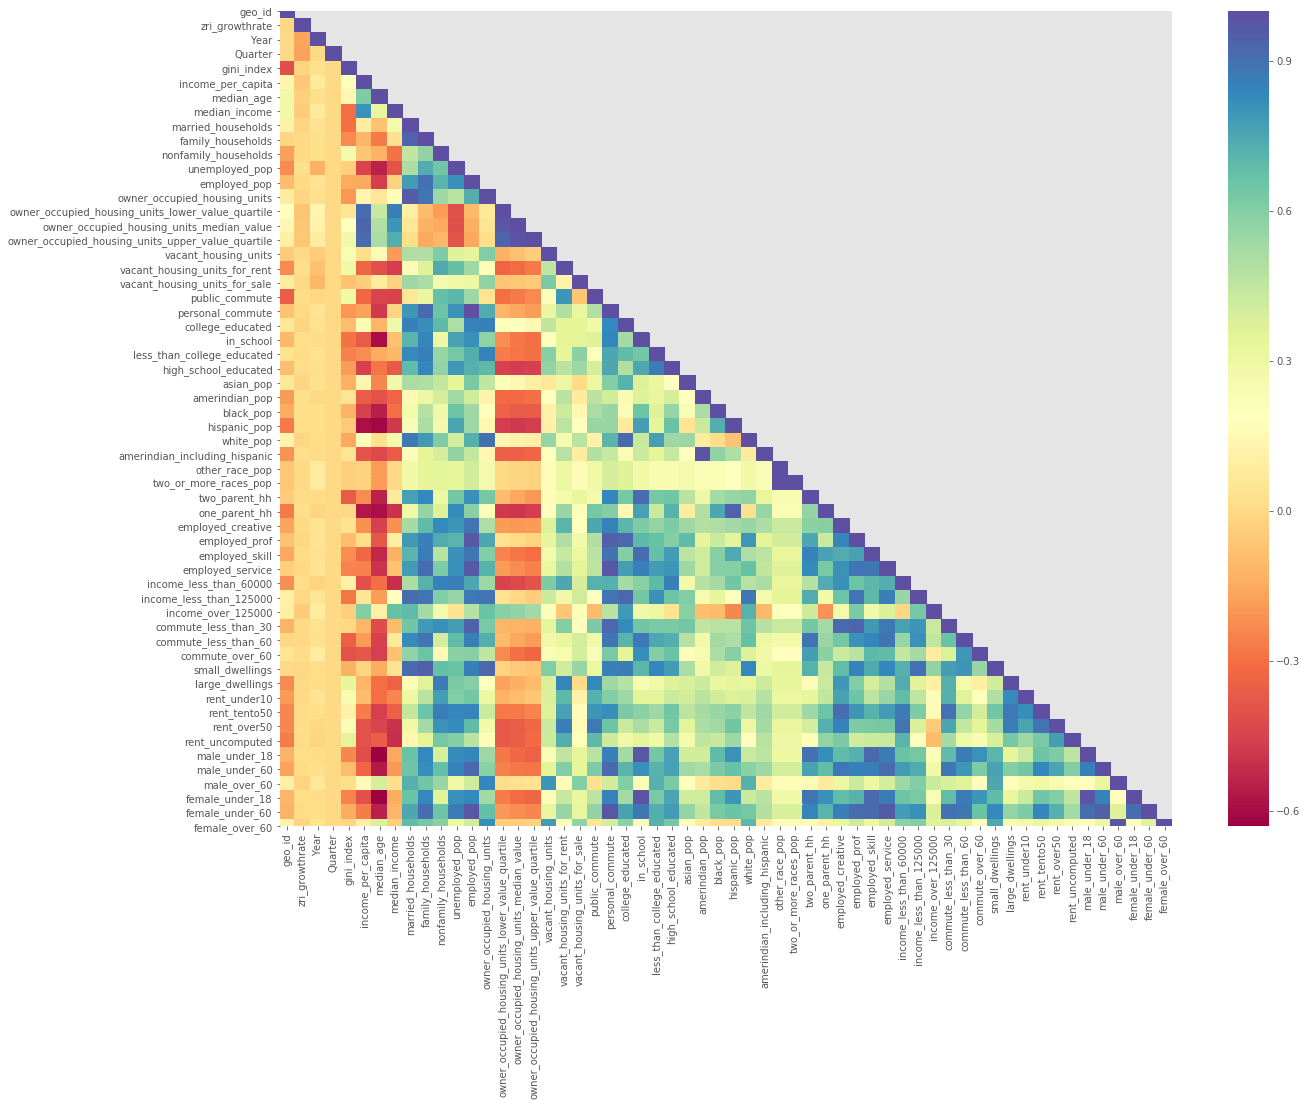

In [165]:
corr_df2 =  result2.corr(method='pearson') 

df_lt2 = corr_df2.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

plt.subplots(figsize=(20,15))
hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap; 

In [ ]:

zri_tampa_growthrate_ten

# OLS

R^2 is equal to 1.000
RSS is equal to 0.000
The intercept is -0.000
The slopes are [-1.96094412e-13  9.99999992e-01  2.88737540e-11 -3.18082685e-10
 -2.61275576e-15 -3.57912836e-13  1.41120112e-15  3.59252179e-14
 -2.03474361e-10 -2.03441198e-10 -5.46309146e-15  4.84385622e-11
  1.09151688e-10 -1.11022302e-16  1.88737914e-15 -2.22044605e-16
 -4.03323208e-16 -3.01841885e-16  1.33205079e-15  5.63785130e-16
 -6.38378239e-16  5.37764278e-16  6.31439345e-16  7.63278329e-17
 -7.56339436e-16  5.44703171e-16 -3.11816545e-16  5.86336535e-16
 -1.56819002e-15 -1.13797860e-15  1.37737044e-15 -2.27776969e-12
  2.27932113e-12  5.62050406e-16 -4.38885039e-16 -4.84392006e-11
 -4.84377052e-11 -4.84381354e-11 -4.84388571e-11  9.42867937e-11
  9.42883896e-11  9.42896733e-11 -9.71445147e-17  1.80411242e-16
 -1.13450915e-15 -2.77555756e-17 -1.63064007e-15  1.09169734e-10
  1.09169632e-10  1.09169188e-10  1.09169494e-10 -5.93275429e-16
  1.52655666e-15 -7.52002627e-16 -1.94289029e-16  8.41340886e-17
 -1.519

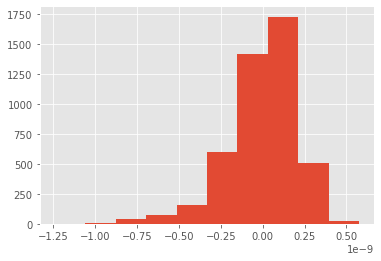

In [193]:
features = result
target = result["zri_growthrate"]

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(features, target)
residuals = target - lm.predict(features)
plt.hist(residuals)

print('R^2 is equal to %.3f' %(lm.score(features, target)))
print('RSS is equal to %.3f' %(sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

print('negative slope column names %s' %(features.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(features.columns[lm.coef_ > 0]))


In [161]:
from sklearn.model_selection import train_test_split
X = result.copy()
y = result["zri_growthrate"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                random_state = 1)

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fix the scale model using the train set
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled  = scaler.transform(Xtest)

In [163]:
Xtrain_scaled = pd.DataFrame(data =Xtrain_scaled, columns = Xtrain.columns)
Xtest_scaled = pd.DataFrame(data =Xtest_scaled, columns = Xtest.columns)

# Lasso

In [170]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_score



cv = KFold(n_splits = 5, shuffle = True)


lasso = Lasso(max_iter = 500000)
alphas = np.linspace(.00000001,1,10)

#manual grid search for ideal alpha
cv_res=[]

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    pipe = Pipeline(steps = [('lasso', lasso)])
    cv_res.append(cross_validate(pipe,Xtrain_scaled,ytrain,
                                 cv = cv, return_train_score = True))

lasso_test = [i['test_score'].mean() for i in cv_res]
lasso_train = [i['train_score'].mean() for i in cv_res]

C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dty

C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dty

C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

In [171]:
print(alphas)
print(lasso_train)
print(lasso_test)

[1.0000000e-08 1.1111112e-01 2.2222223e-01 3.3333334e-01 4.4444445e-01
 5.5555556e-01 6.6666667e-01 7.7777778e-01 8.8888889e-01 1.0000000e+00]
[0.9999997890726894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.999999782538425, -0.0030264160353928203, -0.0022915227677391846, -0.002407712410418661, -0.0019466978067217422, -0.001736095130820381, -0.003859769323435103, -0.0013214199410211958, -0.0009899765386064186, -0.0023557369084348688]


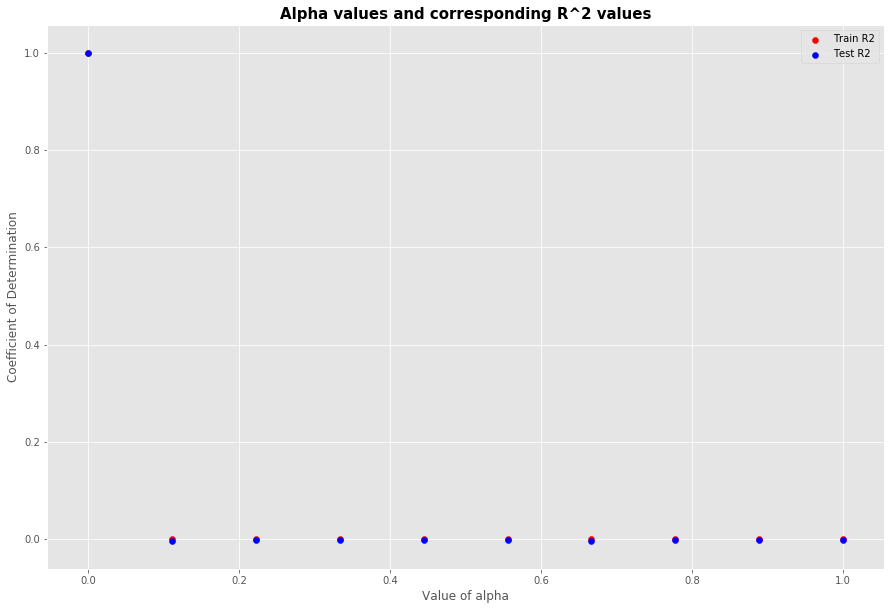

In [172]:
##Plot the alphas and R^2
plt.figure(figsize = (15,10))
plt.scatter(alphas, lasso_train, c = 'red')
plt.scatter(alphas, lasso_test, c = 'blue')

plt.title(r'Alpha values and corresponding R^2 values',fontsize = 15, fontweight = 'bold')
plt.xlabel('Value of alpha')
plt.ylabel('Coefficient of Determination')
plt.legend(['Train R2', 'Test R2'])